In [76]:
# !pip install pandas
# !pip install nltk
# !pip install matplotlib

### The first step is to import the necessary libraries:

In [1]:
import pandas as pd
# plots
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abdellah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdellah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### reading data

In [3]:
df = pd.read_csv("./CleanedreutersData.csv")
df.head(1)

,Topics,Menus,Title,Authors,Date,Images,Text
0,Africa,/world/africa/,Blinken brings U.S. aid to Sahel for fight aga...,Daphne Psaledakis,2023-03-17 10:13:00+00:00,NaN,"NIAMEY, March 16 (Reuters) - U.S. Secretary of..."


### Preprocessing

A function called preprocess_text is defined to preprocess the text data. This function removes punctuation, tokenizes the text, removes stopwords, and lemmatizes the remaining words:

In [4]:

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Load stopwords
stop_words = set(stopwords.words('english'))
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lowercase the remaining words
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

### Word frequency distribution

A loop is then run through each group in the data, where all the article titles are concatenated into a single string, which is then preprocessed using the preprocess_text function. The preprocessed text is then tokenized, and a frequency distribution is created using the FreqDist function from NLTK. Finally, the top 10 most common words for each topic are printed and plotted using Matplotlib:

Topic: ADAS, AV & Safety
[('volkswagen', 1), ('share', 1), ('result', 1), ('mock', 1), ('listing', 1), ('exercise', 1), ('june', 1)]


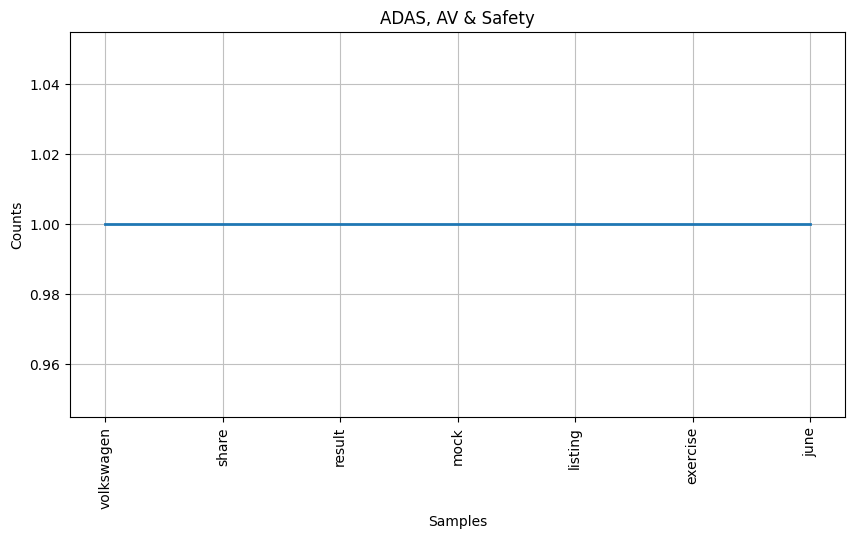

Topic: Aerospace & Defense
[('boeing', 6), ('jet', 6), ('787', 3), ('airbus', 3), ('say', 3), ('bransons', 3), ('virgin', 3), ('orbit', 3), ('explores', 3), ('option', 3)]


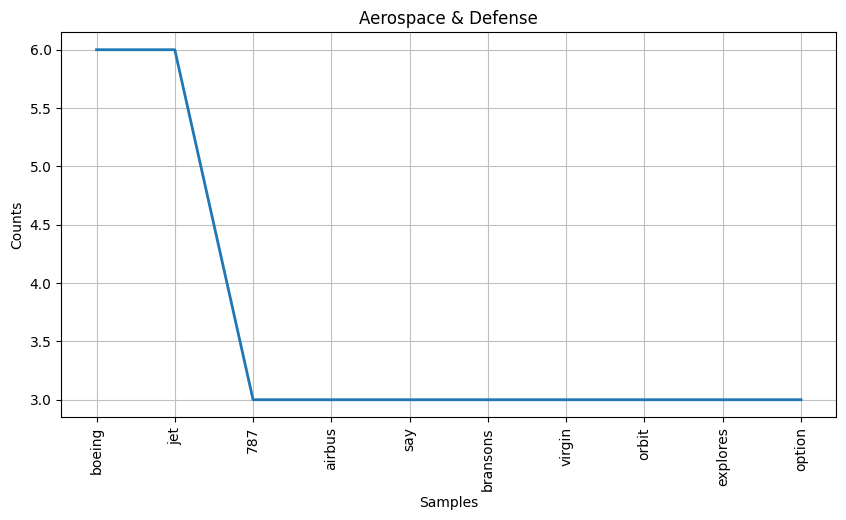

Topic: Africa
[('say', 6), ('malawi', 5), ('south', 5), ('cyclone', 4), ('toll', 4), ('african', 4), ('blinken', 3), ('u', 3), ('freddy', 3), ('mozambique', 3)]


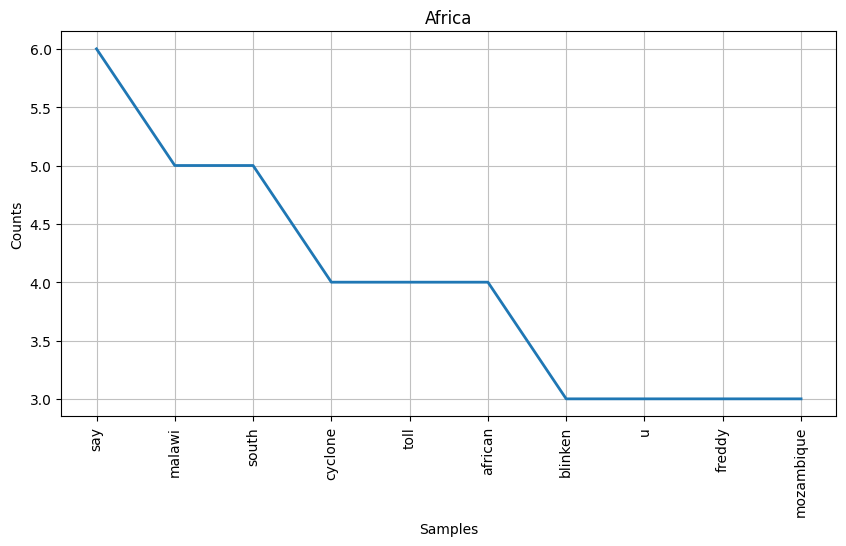

Topic: Americas
[('u', 5), ('brazil', 5), ('colombia', 4), ('death', 3), ('mexico', 3), ('appeal', 3), ('china', 3), ('president', 3), ('say', 3), ('toll', 2)]


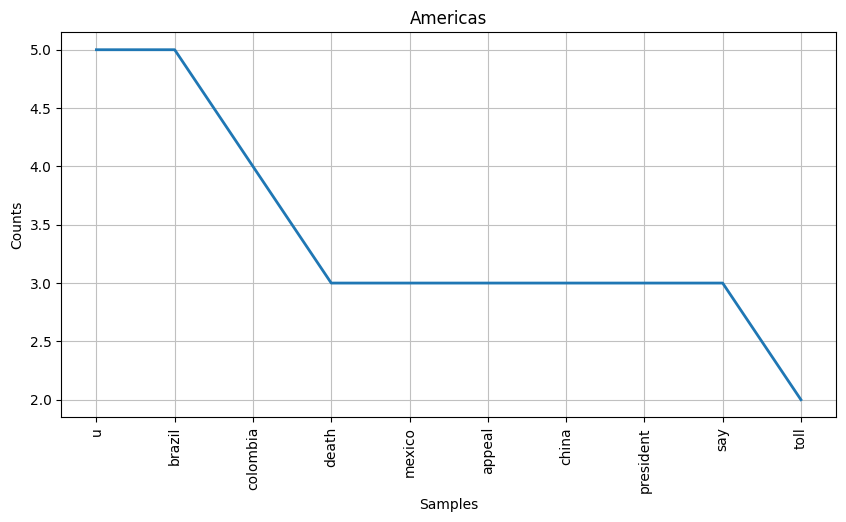

Topic: Asia Pacific
[('korea', 8), ('south', 7), ('say', 5), ('japan', 5), ('pm', 4), ('north', 3), ('pakistan', 3), ('khan', 3), ('police', 3), ('arrest', 3)]


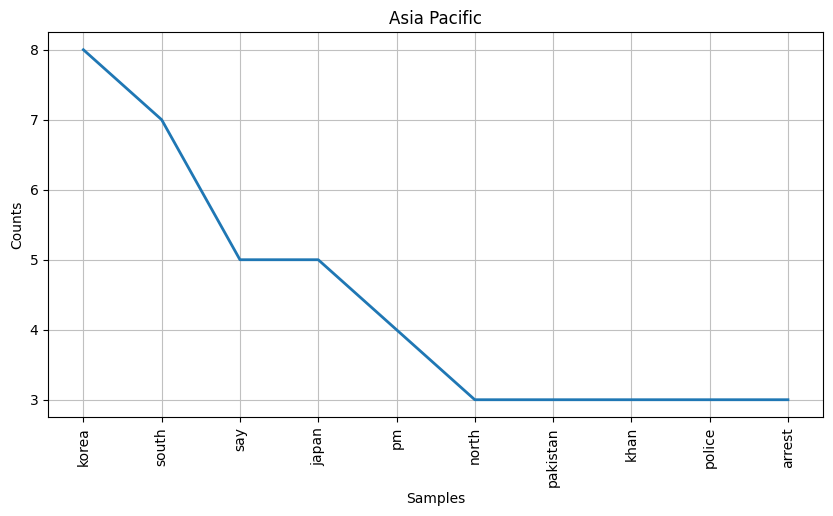

Topic: Asian Markets
[('japan', 2), ('hike', 2), ('market', 2), ('labour', 1), ('union', 1), ('confirm', 1), ('average', 1), ('wage', 1), ('38', 1), ('three', 1)]


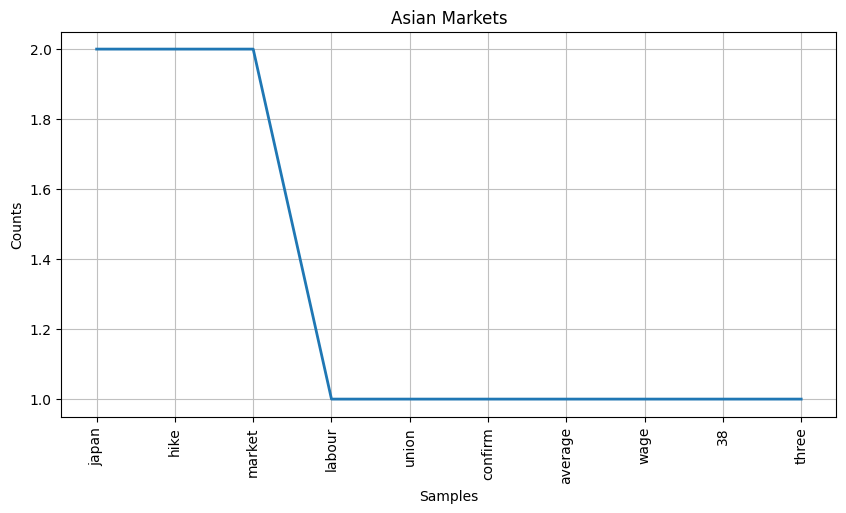

Topic: Autos & Transportation
[('battery', 6), ('ev', 4), ('volkswagen', 3), ('tesla', 3), ('electric', 3), ('offer', 2), ('invests', 2), ('raw', 2), ('material', 2), ('race', 2)]


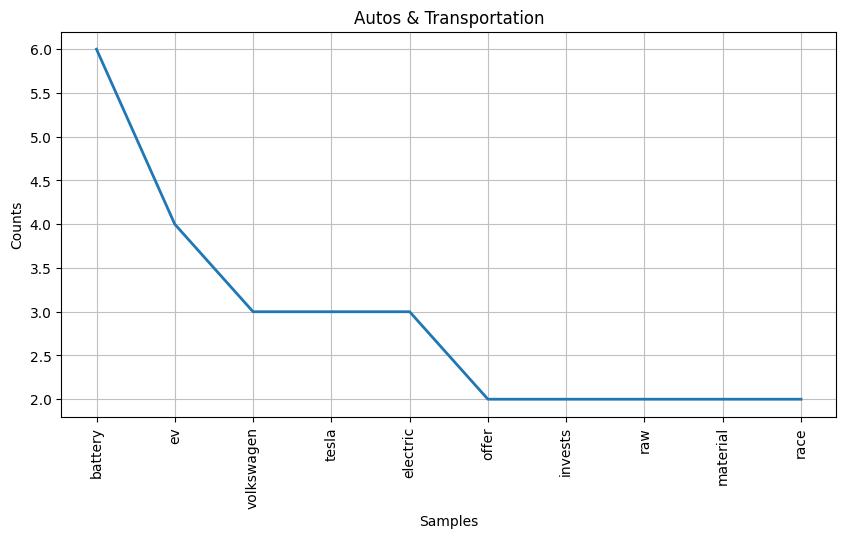

Topic: Breakingviews
[('breakingviews', 1), ('u', 1), ('blacklisting', 1), ('match', 1), ('tiktok', 1), ('virality', 1)]


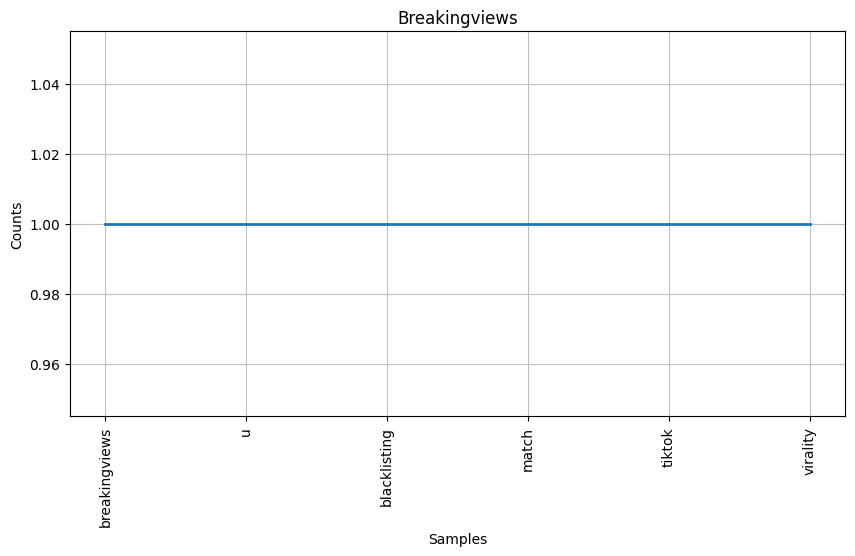

Topic: Business
[('bank', 47), ('u', 35), ('svb', 33), ('say', 25), ('credit', 21), ('suisse', 20), ('fund', 16), ('financial', 12), ('see', 12), ('eu', 11)]


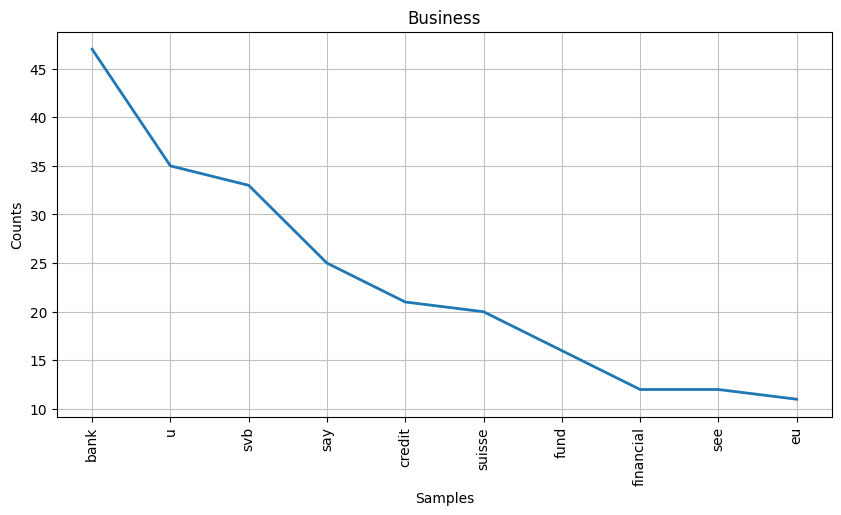

Topic: COVID-19
[('moderna', 1), ('hire', 1), ('around', 1), ('2000', 1), ('employee', 1), ('amid', 1), ('mrna', 1), ('development', 1), ('push', 1)]


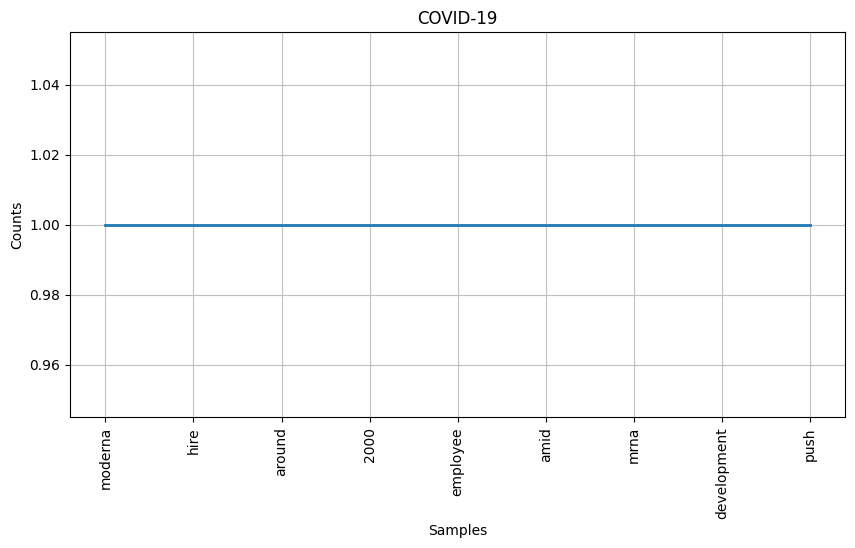

Topic: Carbon Markets
[('bid', 2), ('500', 2), ('mln', 2), ('u', 2), ('climate', 2), ('grant', 2), ('direct', 2), ('air', 2), ('carbon', 2), ('capture', 2)]


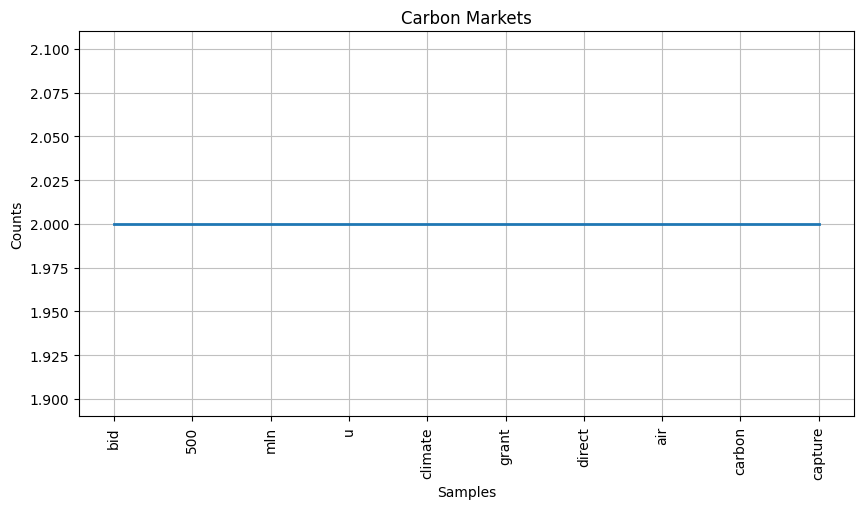

Topic: Charged
[('ev', 10), ('battery', 9), ('plant', 7), ('volkswagen', 6), ('startup', 5), ('electric', 5), ('car', 5), ('see', 4), ('supply', 4), ('chain', 4)]


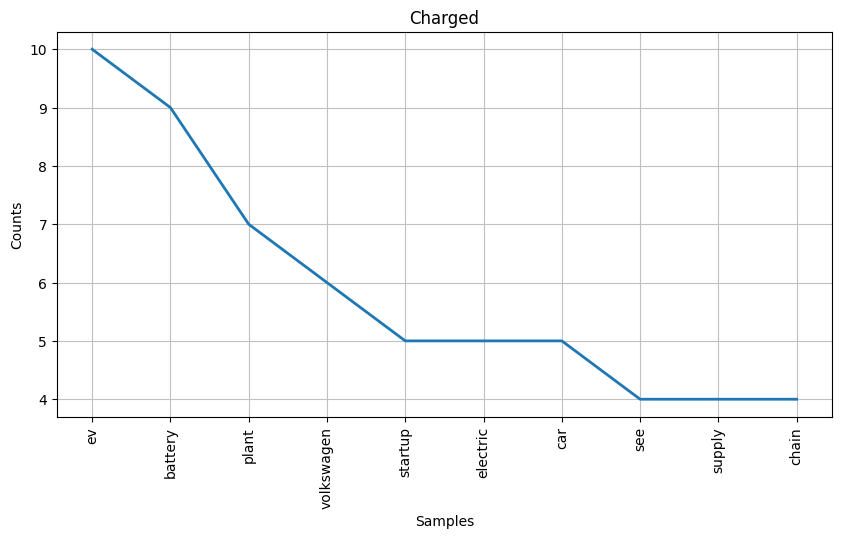

Topic: China
[('china', 9), ('xi', 2), ('ukraine', 2), ('create', 2), ('powerful', 2), ('financial', 2), ('watchdog', 2), ('run', 2), ('communist', 2), ('party', 2)]


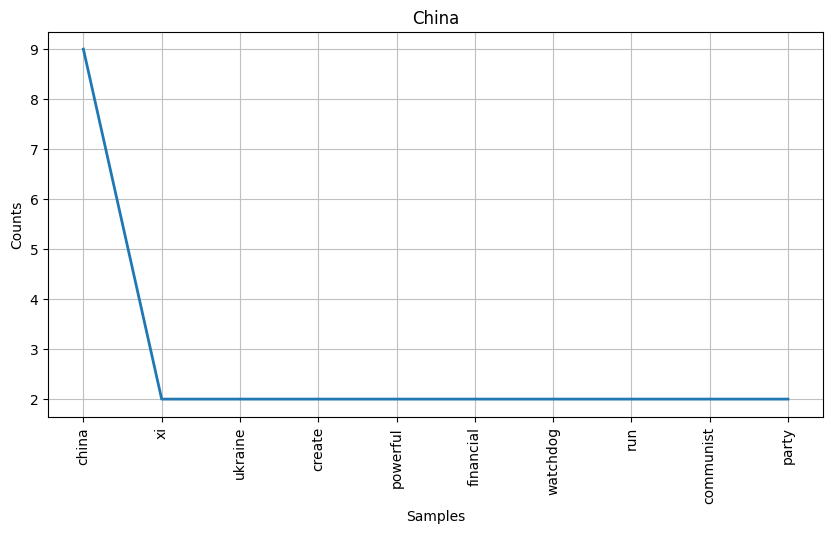

Topic: Clean Energy
[('energy', 4), ('climate', 4), ('goal', 4), ('crisis', 2), ('seen', 2), ('posing', 2), ('existential', 2), ('threat', 2), ('reducing', 2), ('waste', 2)]


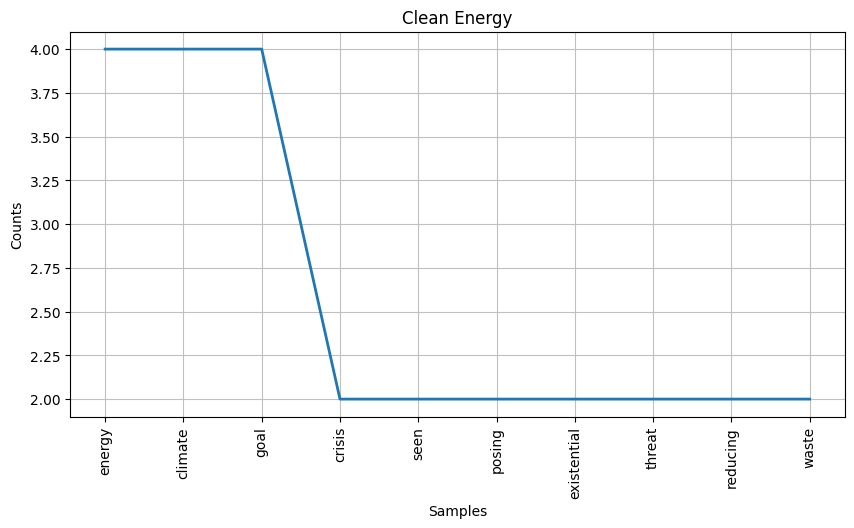

Topic: Climate Change
[('billionaire', 2), ('ibrahim', 2), ('decries', 2), ('double', 2), ('standard', 2), ('west', 2), ('seeking', 2), ('gas', 2), ('africa', 2), ('uk', 2)]


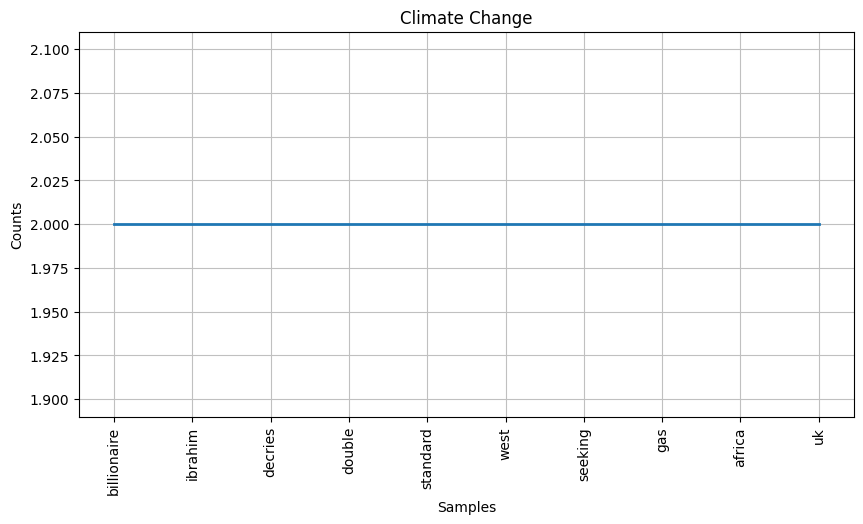

Topic: Commodities
[('gold', 2), ('talk', 2), ('safe', 1), ('sprint', 1), ('towards', 1), ('best', 1), ('week', 1), ('since', 1), ('nov', 1), ('banking', 1)]


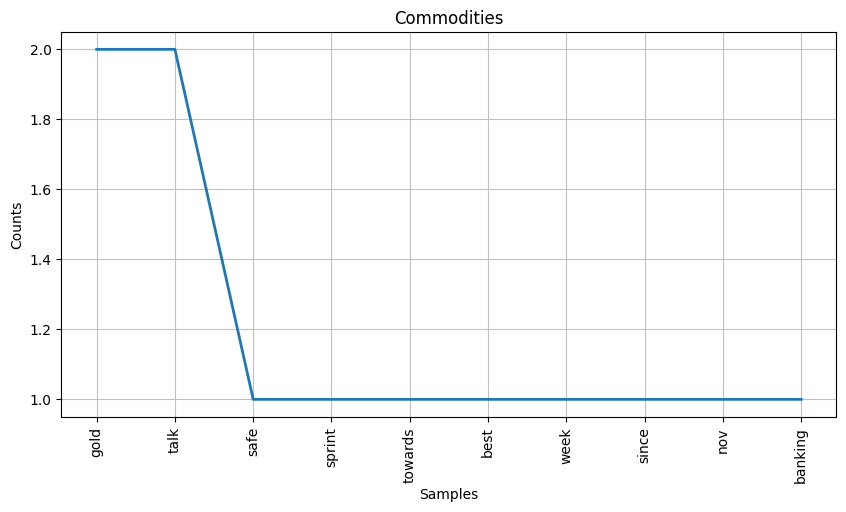

Topic: Currencies
[('rupee', 7), ('india', 4), ('dollar', 3), ('bank', 3), ('u', 2), ('sterling', 2), ('rise', 2), ('worry', 2), ('sentiment', 2), ('banking', 2)]


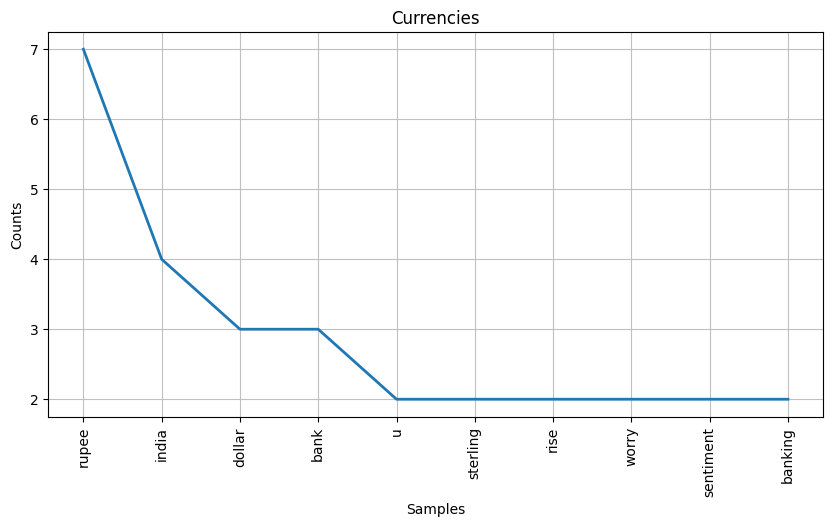

Topic: Deals
[('bln', 7), ('deal', 6), ('mln', 3), ('stake', 3), ('source', 3), ('pfizer', 2), ('look', 2), ('past', 2), ('covid', 2), ('43', 2)]


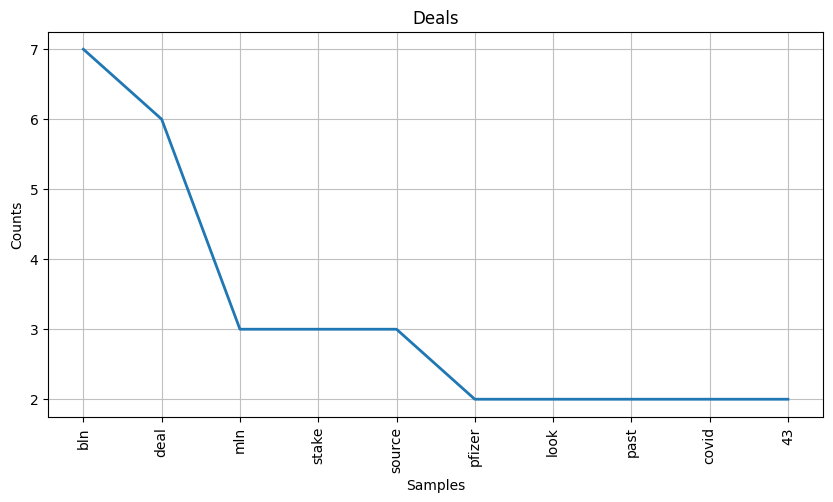

Topic: Disrupted
[('ai', 12), ('gpt4', 6), ('openais', 5), ('chatgpt', 5), ('microsoftbacked', 4), ('startup', 4), ('unveils', 4), ('openai', 4), ('race', 4), ('explainer', 3)]


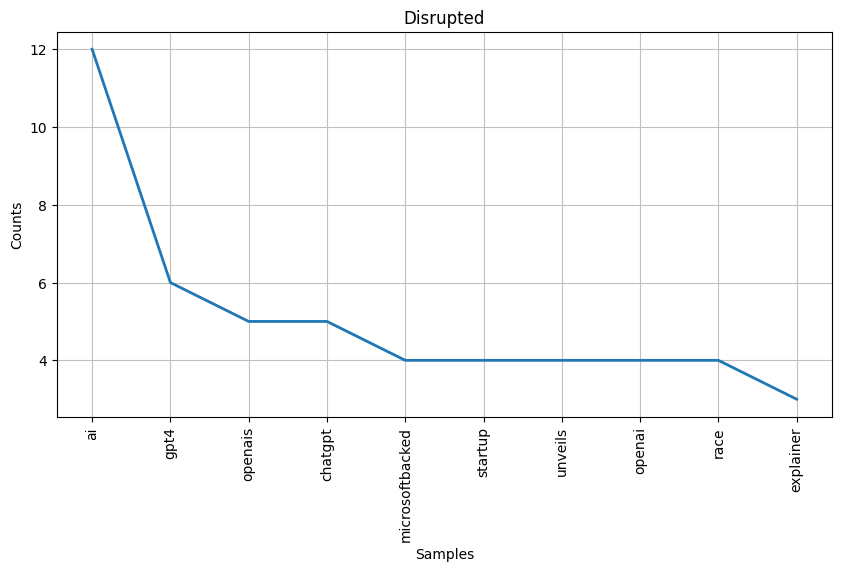

Topic: ESG Investors
[('credit', 2), ('suisse', 2), ('set', 2), ('2030', 2), ('target', 2), ('emission', 2), ('tied', 2), ('loan', 2), ('wage', 2), ('go', 2)]


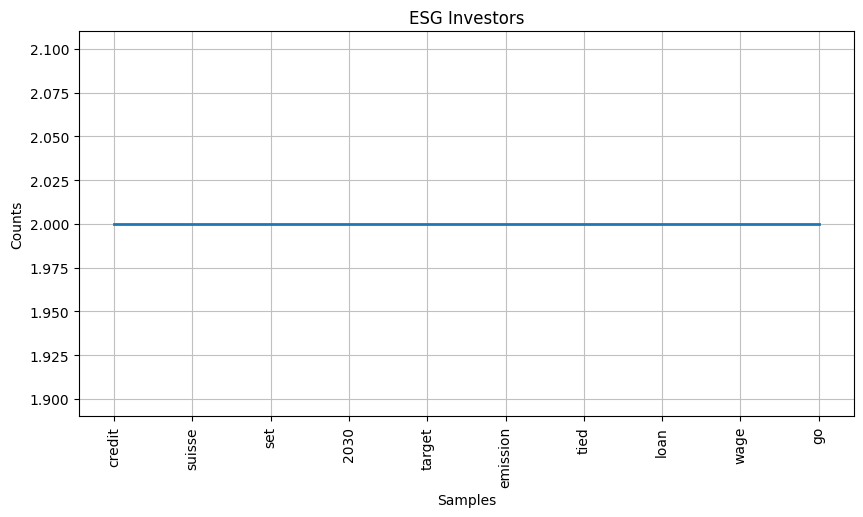

Topic: Employee Benefits & Executive Compensation
[('calpers', 2), ('ceo', 2), ('frost', 2), ('hope', 2), ('cop26', 2), ('yield', 2), ('greeninvesting', 2), ('data', 2), ('caterpillar', 1), ('union', 1)]


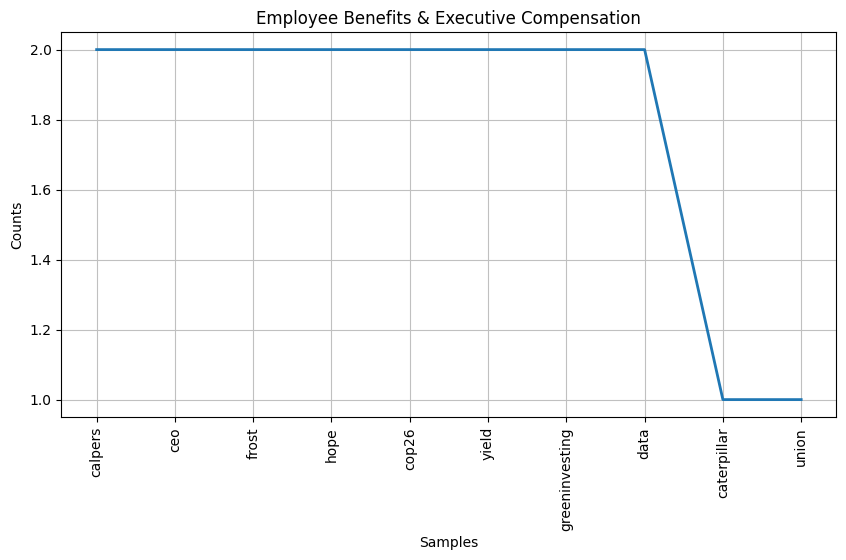

Topic: Employee Health
[('amgen', 1), ('cut', 1), ('450', 1), ('job', 1), ('second', 1), ('round', 1), ('layoff', 1), ('year', 1)]


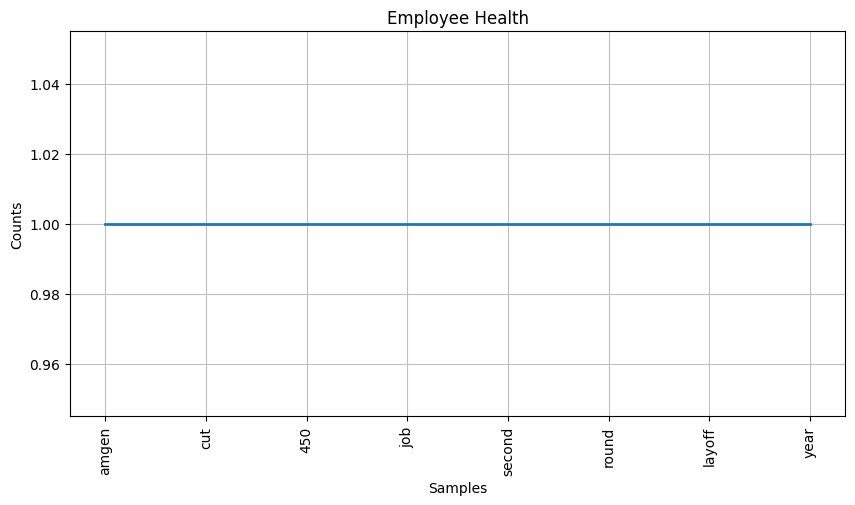

Topic: Energy
[('india', 2), ('greenko', 2), ('cofounder', 2), ('keen', 2), ('return', 2), ('london', 2), ('market', 2), ('u', 1), ('investigator', 1), ('cite', 1)]


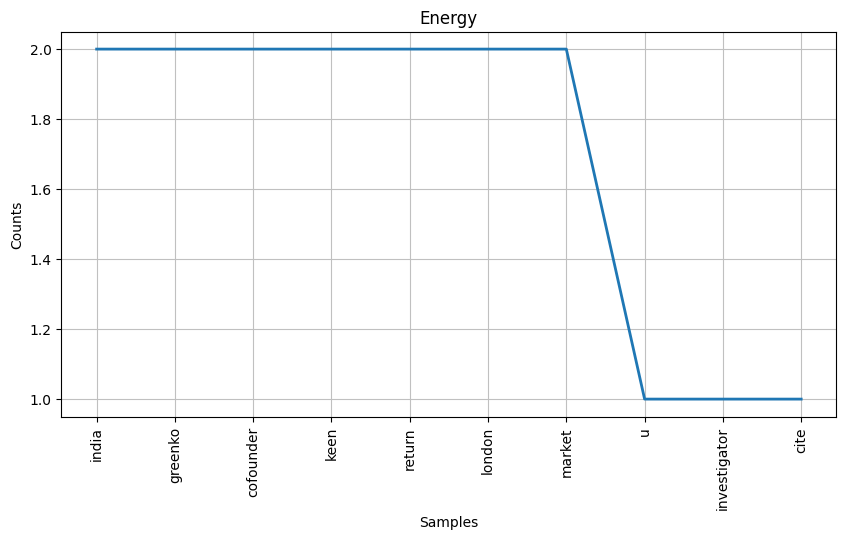

Topic: Environment
[('eu', 6), ('say', 4), ('water', 4), ('emission', 3), ('energy', 3), ('limit', 3), ('cyclone', 3), ('among', 3), ('green', 3), ('policy', 3)]


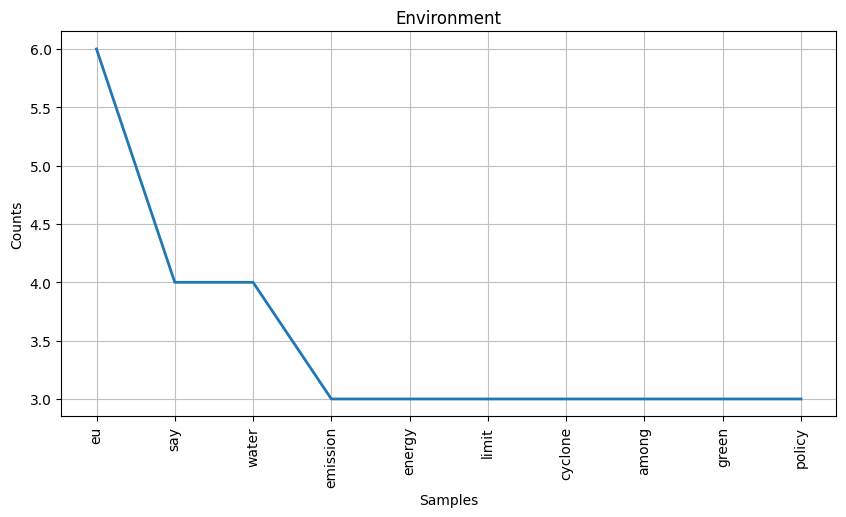

Topic: Europe
[('russia', 7), ('say', 7), ('ukraine', 7), ('deal', 6), ('pension', 5), ('russian', 4), ('reform', 4), ('minister', 3), ('grain', 3), ('eu', 3)]


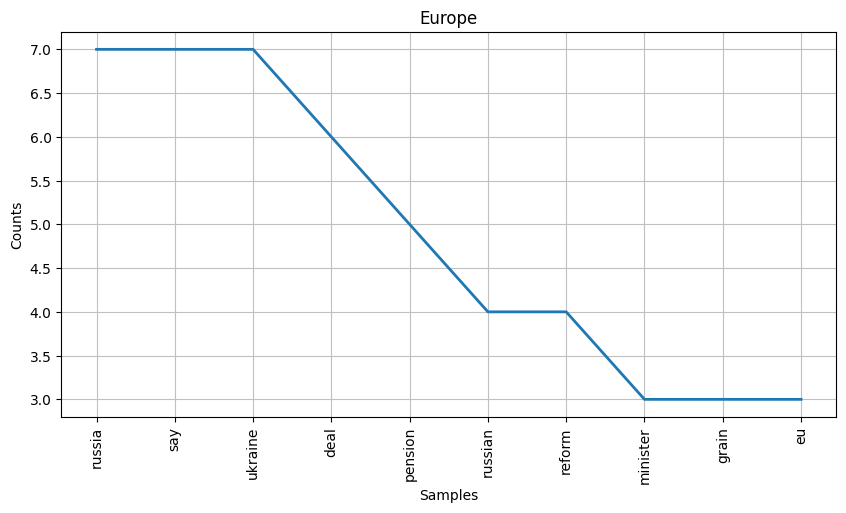

Topic: European Markets
[('rate', 4), ('share', 3), ('european', 3), ('hike', 3), ('ecb', 3), ('end', 2), ('hedge', 2), ('fund', 2), ('europe', 2), ('stock', 2)]


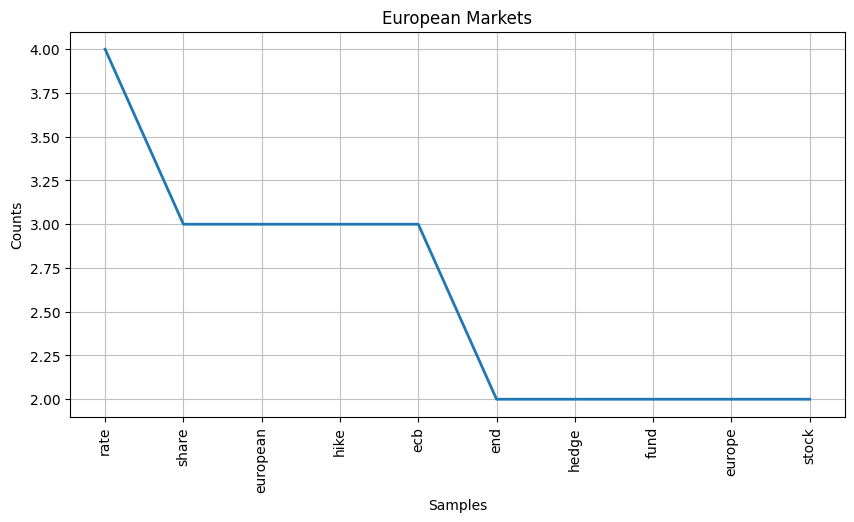

Topic: Exploration & Production
[('oil', 4), ('price', 2), ('equinor', 2), ('gas', 2), ('make', 2), ('u', 1), ('treasury', 1), ('iae', 1), ('report', 1), ('show', 1)]


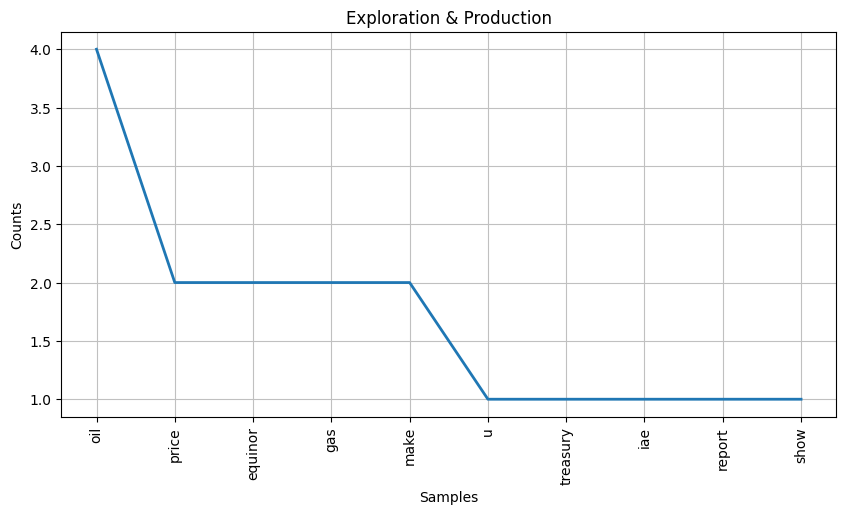

Topic: Finance
[('bank', 20), ('credit', 12), ('suisse', 12), ('u', 12), ('svb', 8), ('ecb', 6), ('watchdog', 5), ('factbox', 5), ('finance', 4), ('see', 4)]


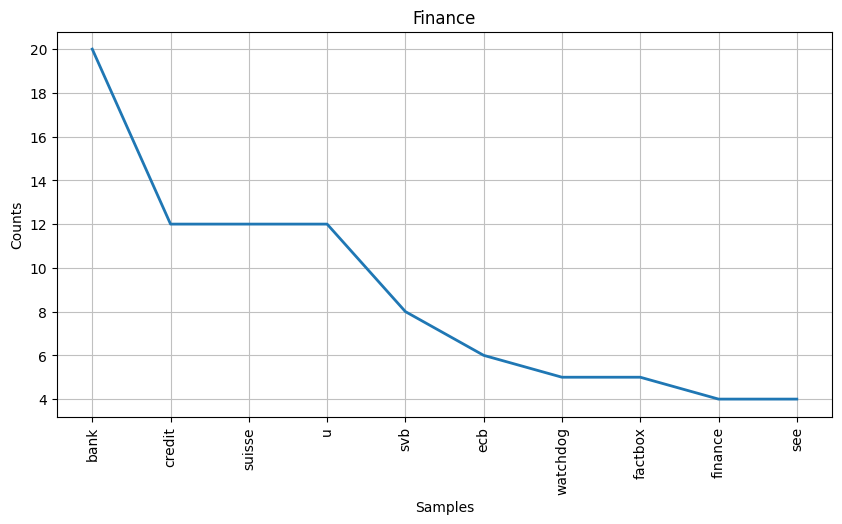

Topic: Financial Results
[('vws', 1), ('skoda', 1), ('final', 1), ('stage', 1), ('deal', 1), ('sell', 1), ('russian', 1), ('asset', 1), ('say', 1), ('ceo', 1)]


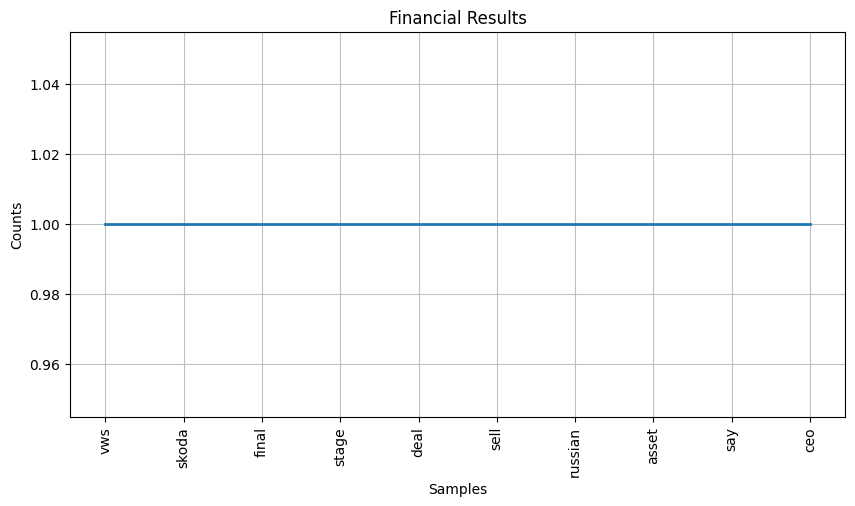

Topic: Fuel
[('decarbonisation', 1), ('centre', 1), ('start', 1), ('5yr', 1), ('partnership', 1), ('container', 1), ('shipper', 1), ('msc', 1)]


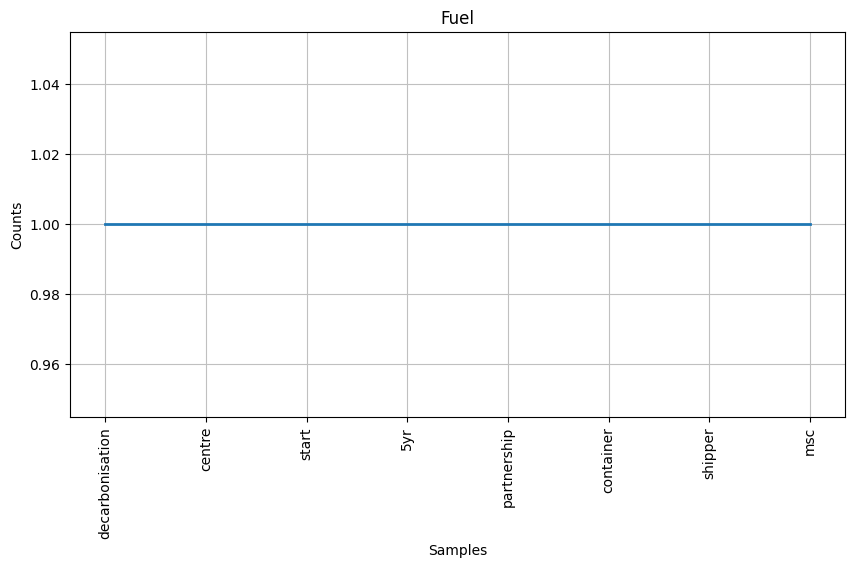

Topic: Fuel Oil
[('siemens', 2), ('energy', 2), ('sell', 2), ('13', 2), ('billion', 2), ('share', 2), ('help', 2), ('fund', 2), ('gamesa', 2), ('bid', 2)]


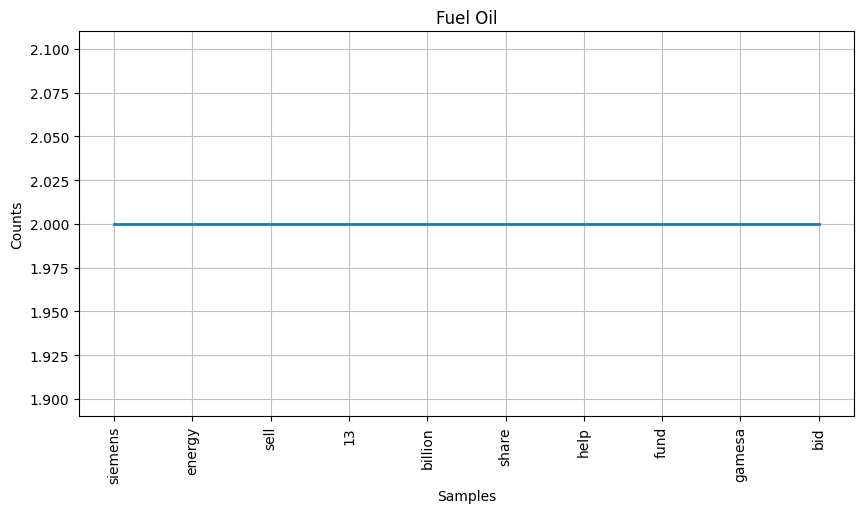

Topic: Future of Health
[('u', 12), ('fda', 7), ('vaccine', 5), ('drug', 5), ('gsk', 3), ('pfizer', 3), ('price', 3), ('negotiation', 3), ('approves', 3), ('nasal', 3)]


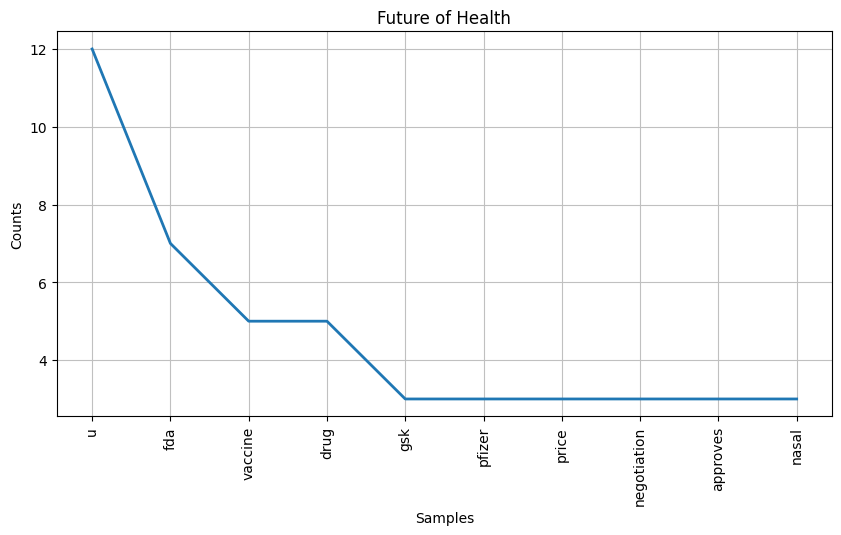

Topic: Future of Money
[('crypto', 17), ('u', 6), ('new', 5), ('bitcoin', 4), ('nfts', 4), ('amid', 4), ('banking', 4), ('million', 3), ('transfer', 3), ('wind', 3)]


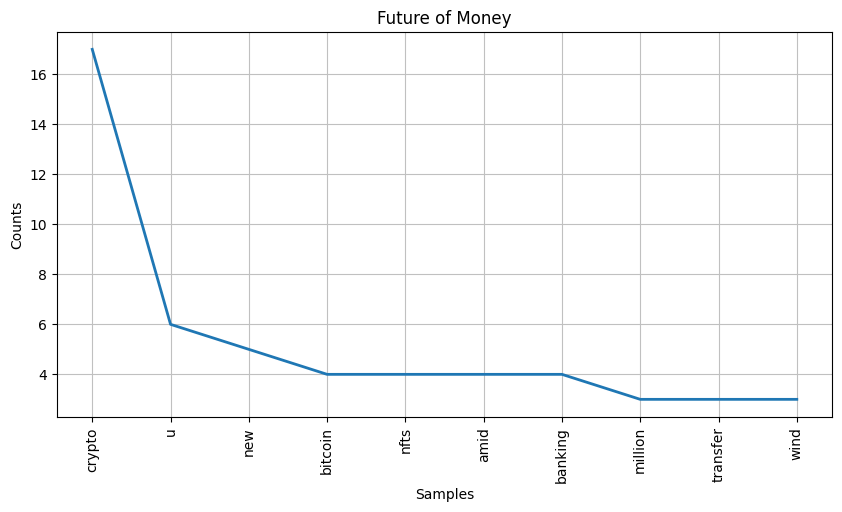

Topic: Governance
[('buying', 2), ('uniper', 2), ('mistake', 2), ('finnish', 2), ('finance', 2), ('minister', 2), ('say', 2)]


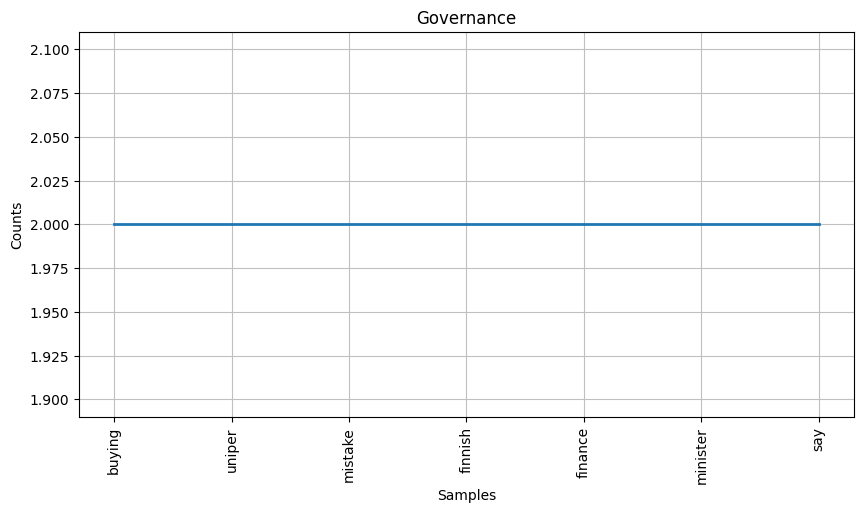

Topic: Government
[('u', 4), ('sue', 3), ('rite', 3), ('aid', 3), ('missing', 3), ('opioid', 3), ('red', 3), ('flag', 3), ('judge', 1), ('mull', 1)]


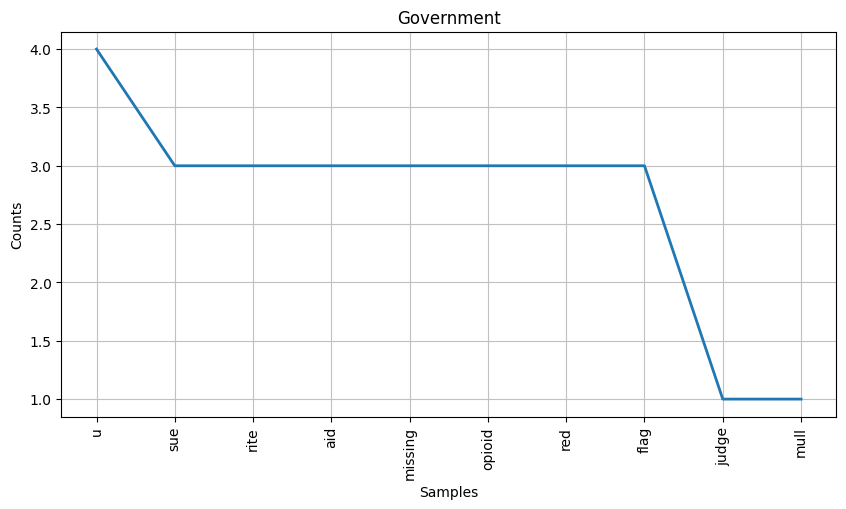

Topic: Grid & Infrastructure
[('italy', 3), ('terna', 2), ('invest', 2), ('21', 2), ('bln', 2), ('euro', 2), ('power', 2), ('grid', 2), ('10', 2), ('year', 2)]


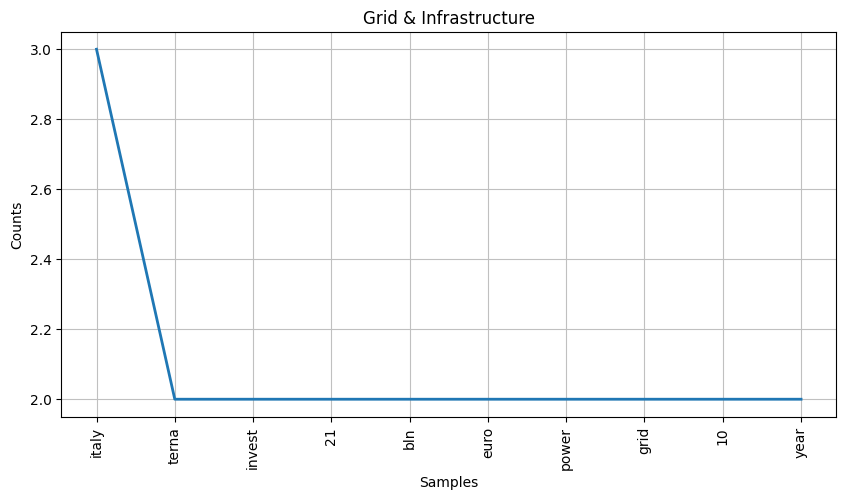

Topic: Healthcare & Pharmaceuticals
[('drug', 8), ('u', 8), ('fda', 6), ('pharma', 4), ('alzheimers', 3), ('say', 3), ('novo', 3), ('eli', 3), ('plan', 3), ('pfizers', 2)]


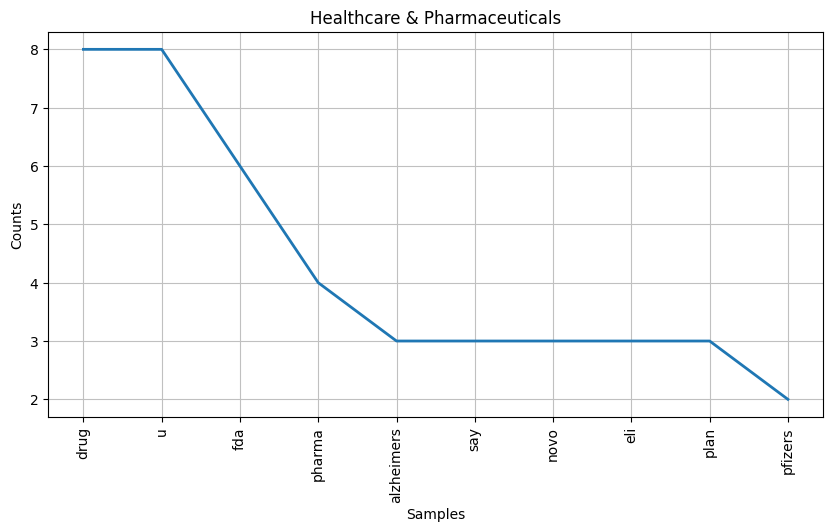

Topic: India
[('india', 16), ('rupee', 4), ('indian', 3), ('share', 3), ('global', 3), ('bln', 3), ('focus', 3), ('200', 2), ('stock', 2), ('plan', 2)]


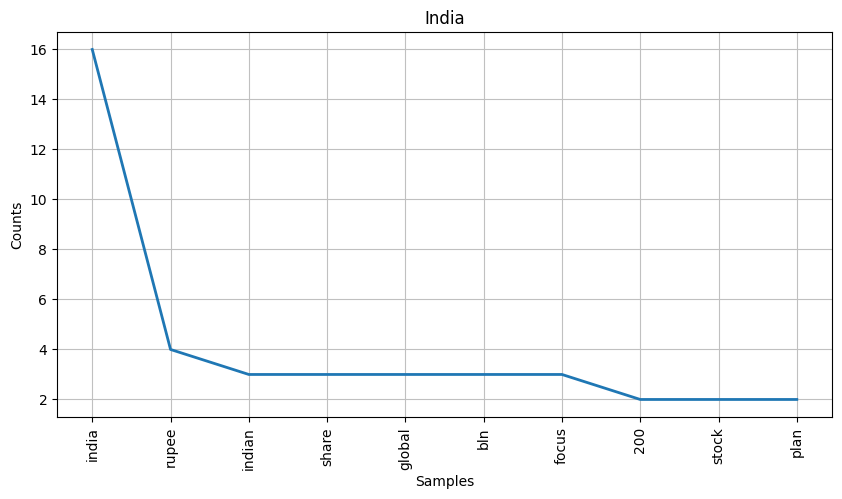

Topic: Investigations
[('dow', 1), ('said', 1), ('recycling', 1), ('shoe', 1), ('found', 1), ('indonesian', 1), ('flea', 1), ('market', 1)]


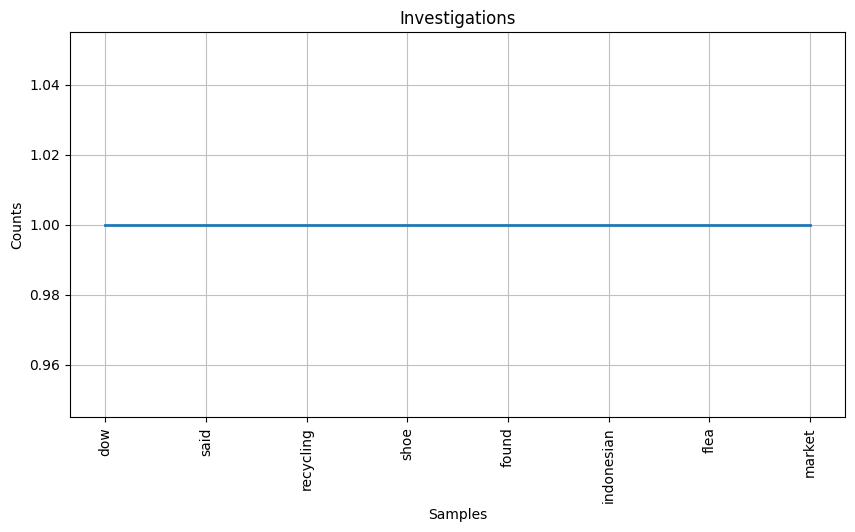

Topic: Legal
[('alaska', 6), ('willow', 6), ('project', 6), ('u', 4), ('sue', 4), ('say', 4), ('approval', 4), ('oil', 4), ('court', 4), ('trump', 3)]


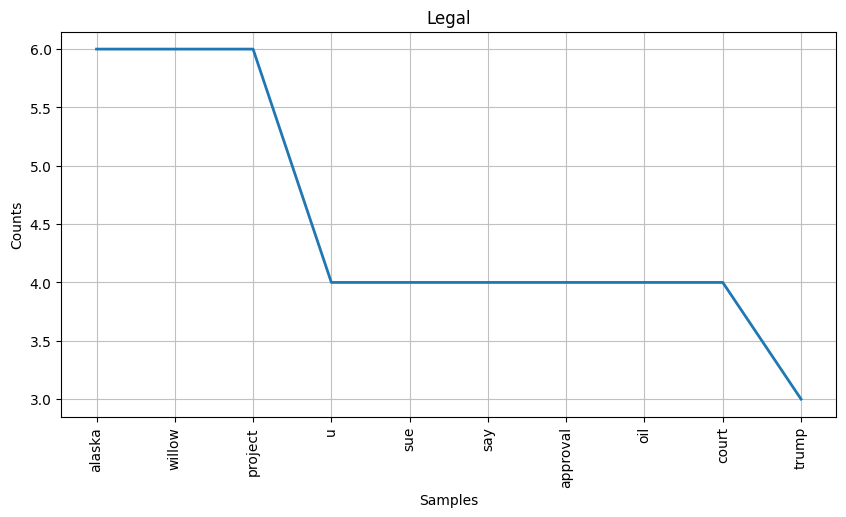

Topic: Lifestyle
[('oscar', 8), ('win', 6), ('return', 3), ('new', 3), ('best', 3), ('everything', 3), ('everywhere', 3), ('saudi', 2), ('charles', 2), ('mug', 2)]


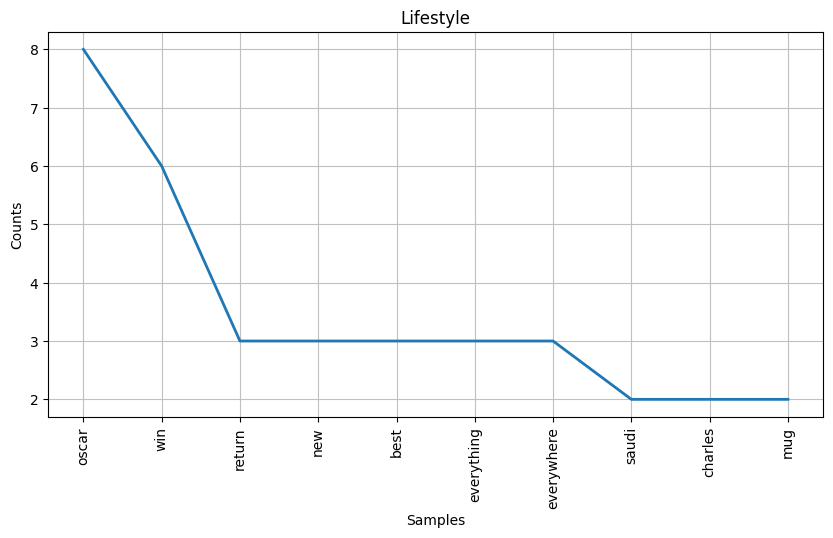

Topic: Litigation
[('u', 1), ('judge', 1), ('refuse', 1), ('delay', 1), ('voyagerbinance', 1), ('sale', 1), ('doj', 1), ('appeal', 1), ('new', 1), ('york', 1)]


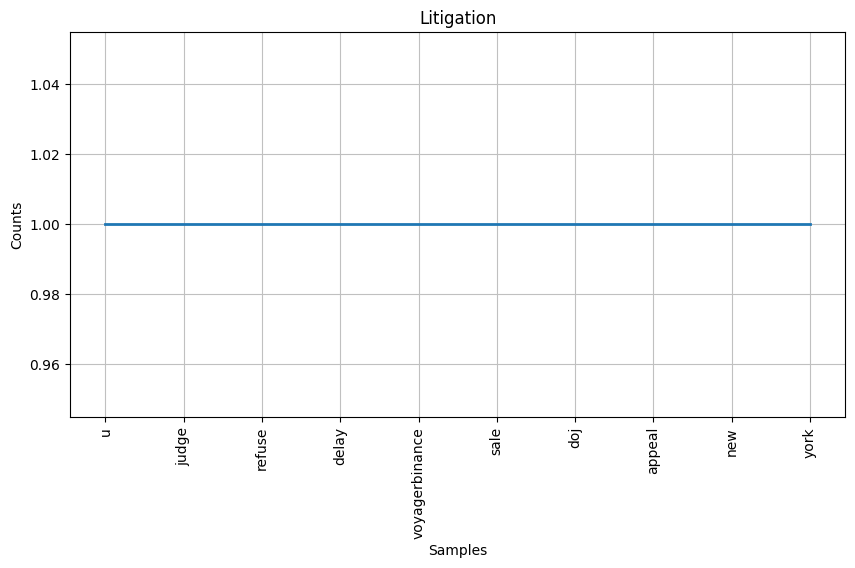

Topic: Macro Matters
[('rate', 15), ('hike', 14), ('bank', 13), ('u', 11), ('inflation', 10), ('economy', 10), ('february', 9), ('fed', 8), ('analysis', 8), ('despite', 7)]


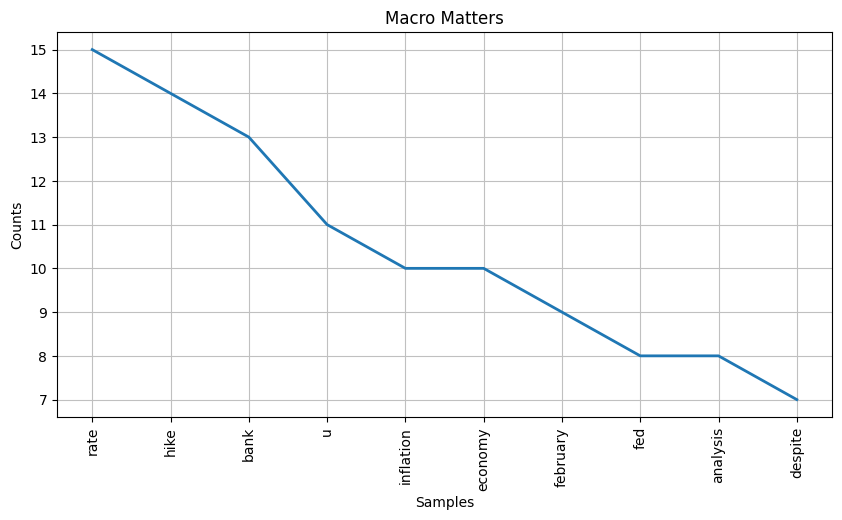

Topic: Markets
[('bank', 21), ('u', 13), ('banking', 12), ('svb', 12), ('share', 11), ('bid', 10), ('market', 10), ('rate', 9), ('rupee', 7), ('morning', 7)]


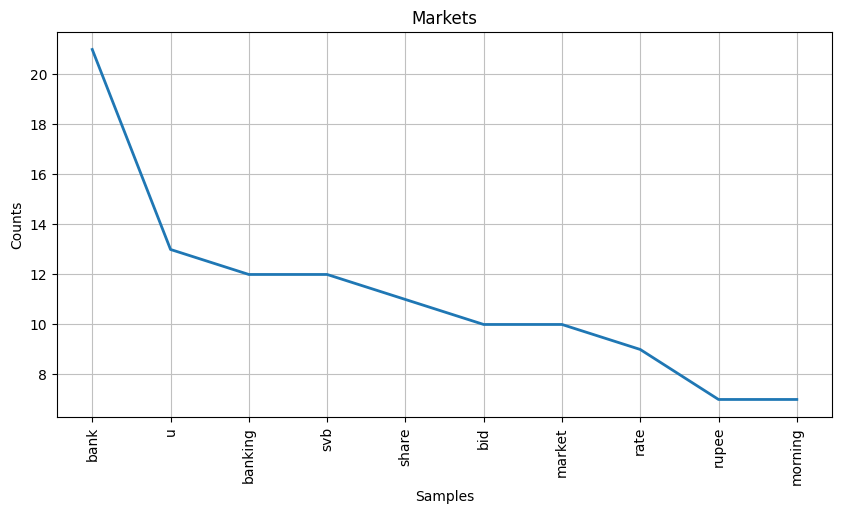

Topic: Media & Telecom
[('three', 2), ('biden', 2), ('administration', 2), ('look', 2), ('free', 2), ('wireless', 2), ('spectrum', 2), ('advanced', 2), ('technology', 2), ('vodafone', 1)]


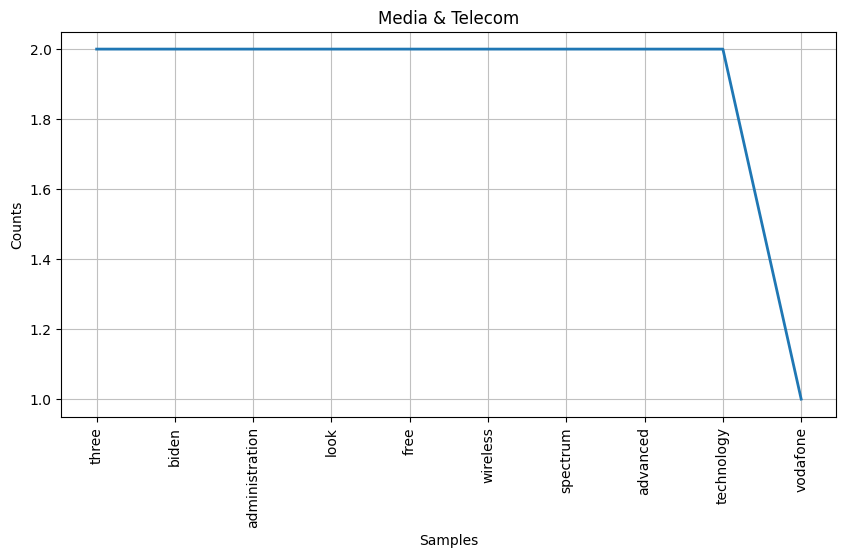

Topic: Middle East
[('analysis', 6), ('iran', 5), ('turkey', 5), ('top', 4), ('source', 4), ('israeli', 4), ('official', 4), ('bank', 4), ('quake', 4), ('syria', 4)]


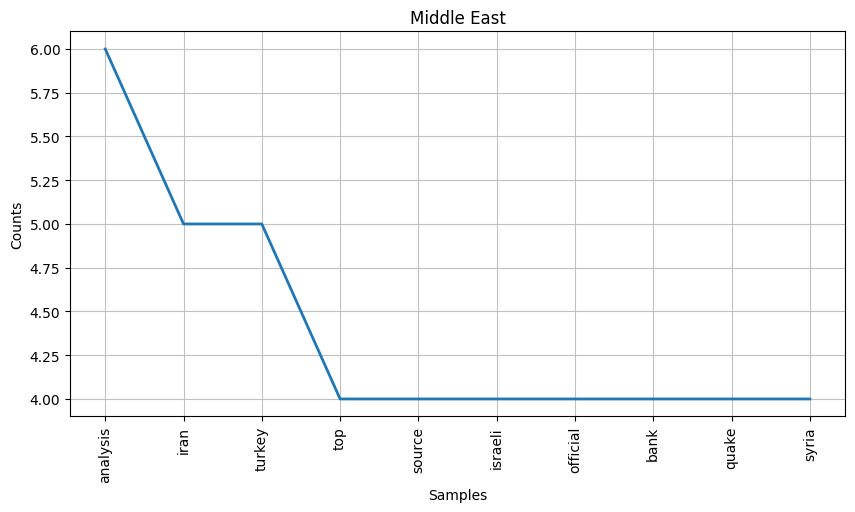

Topic: OPEC
[('opec', 3), ('oil', 3), ('view', 2), ('price', 2), ('drop', 2), ('financially', 2), ('driven', 2), ('delegate', 2), ('say', 2), ('raise', 1)]


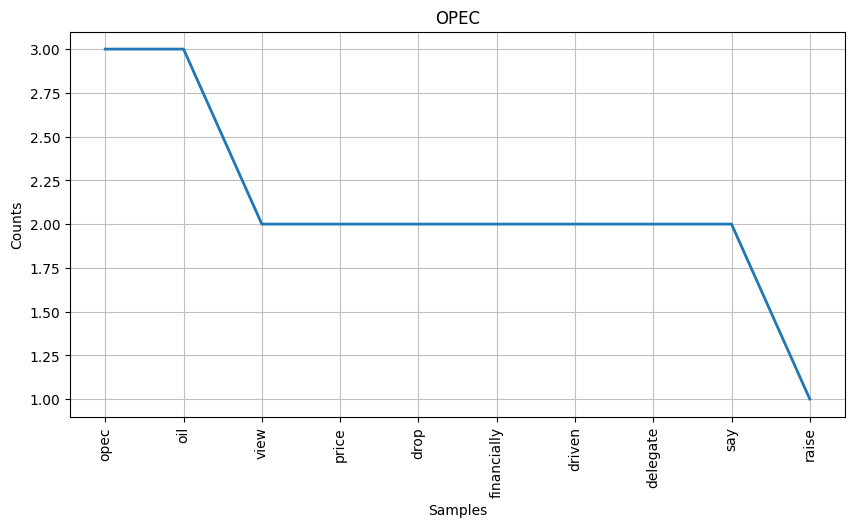

Topic: Partnerships & M&A
[('motor', 2), ('hyundai', 1), ('line', 1), ('buy', 1), ('general', 1), ('india', 1), ('plant', 1)]


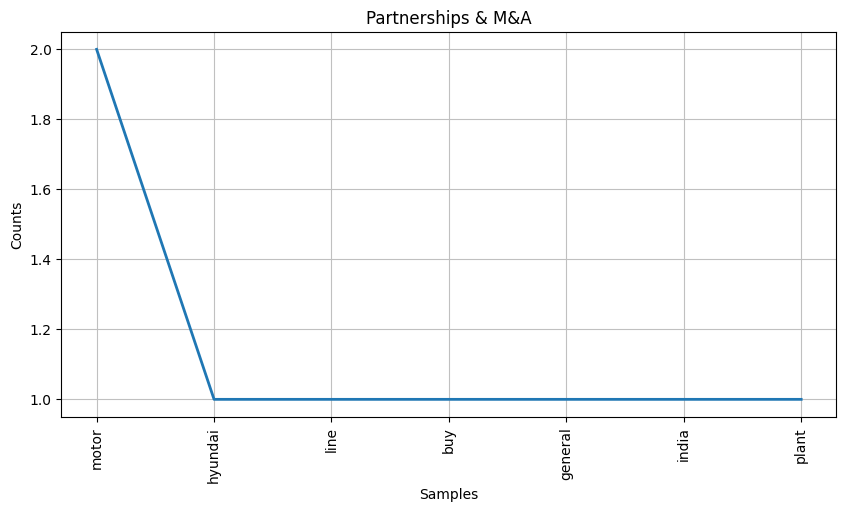

Topic: Public Health
[('two', 1), ('new', 1), ('vaccine', 1), ('bird', 1), ('flu', 1), ('effective', 1), ('dutch', 1), ('lab', 1), ('govt', 1)]


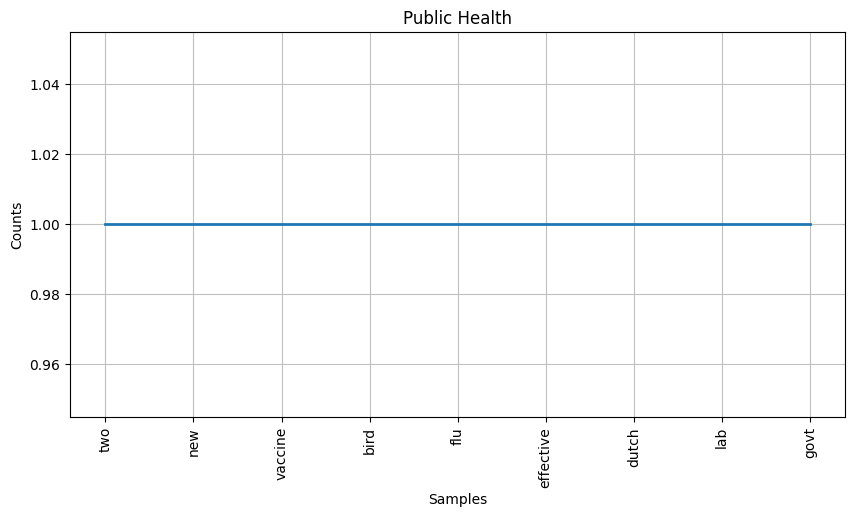

Topic: Rates & Bonds
[('hike', 4), ('rate', 4), ('investor', 3), ('fed', 3), ('ecb', 2), ('bank', 2), ('seen', 2), ('delivering', 2), ('quarterpoint', 2), ('next', 2)]


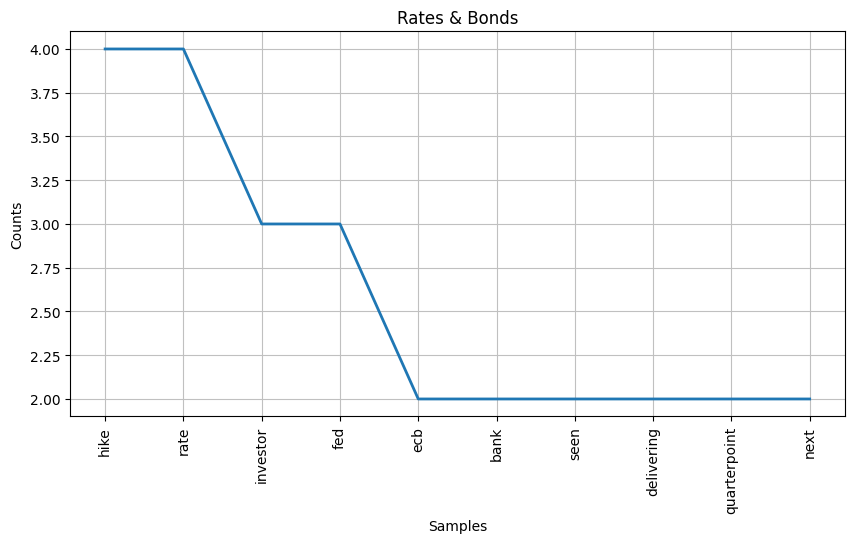

Topic: Regulatory Oversight
[('bank', 2), ('england', 2), ('study', 2), ('climaterelated', 2), ('capital', 2), ('opec', 2), ('stick', 2), ('production', 2), ('cut', 2), ('saudi', 2)]


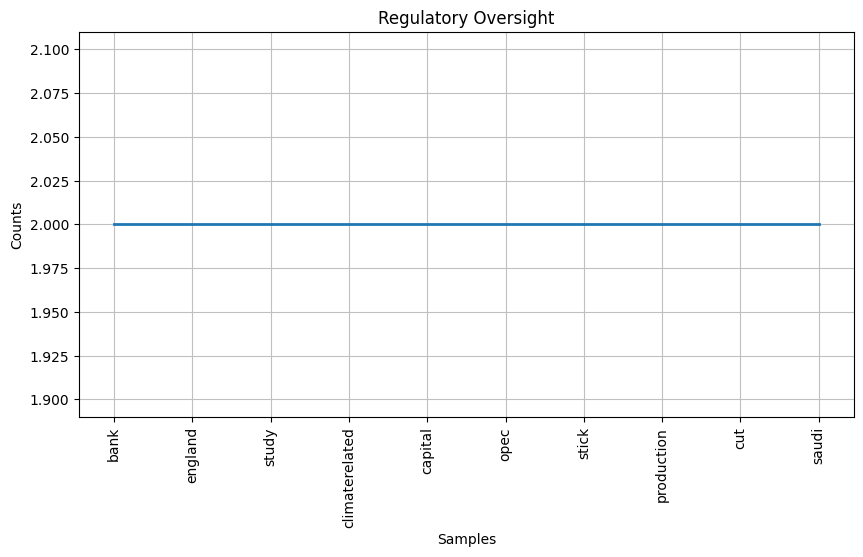

Topic: Renewable Fuels
[('bmw', 1), ('efuels', 1), ('highest', 1), ('impact', 1), ('current', 1), ('fleet', 1), ('new', 1), ('car', 1), ('exclusive', 1), ('hydrogen', 1)]


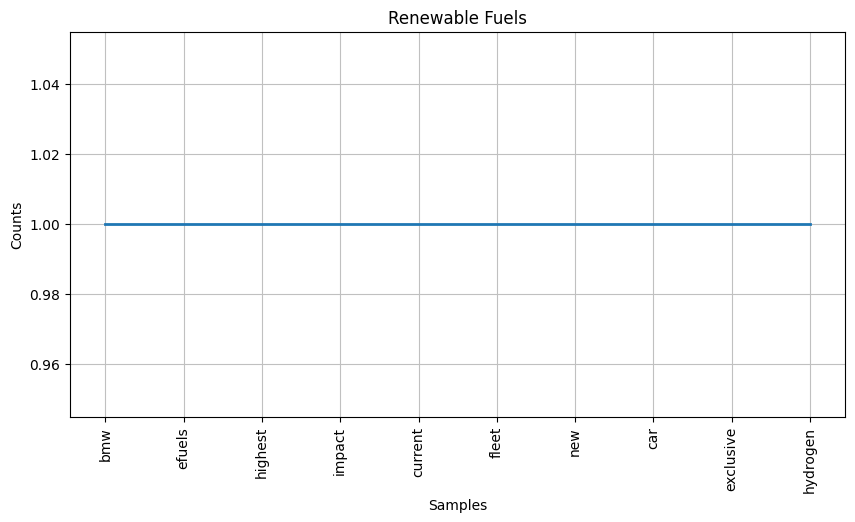

Topic: Retail & Consumer
[('sale', 6), ('new', 5), ('u', 5), ('dollar', 3), ('spending', 3), ('rise', 3), ('appoints', 3), ('hm', 3), ('general', 2), ('miss', 2)]


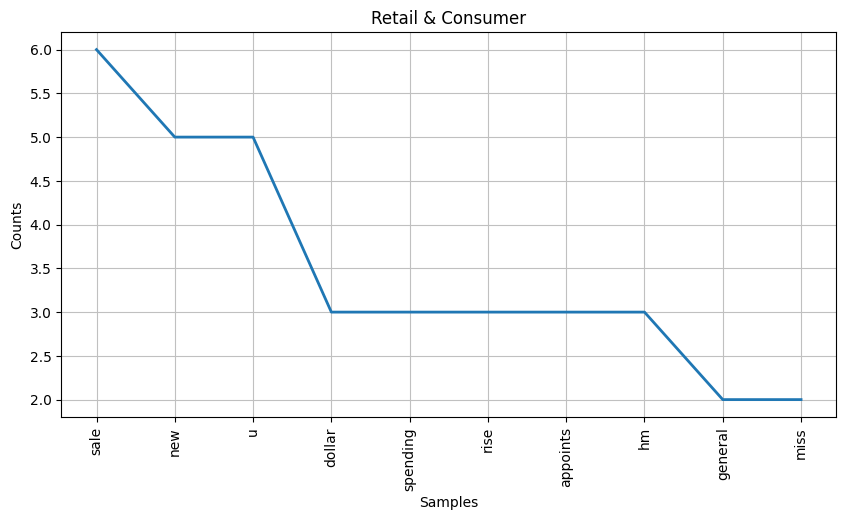

Topic: Science
[('launch', 3), ('amazon', 2), ('target', 2), ('2024', 2), ('first', 2), ('kuiper', 2), ('internet', 2), ('satellite', 2), ('relativity', 1), ('postpones', 1)]


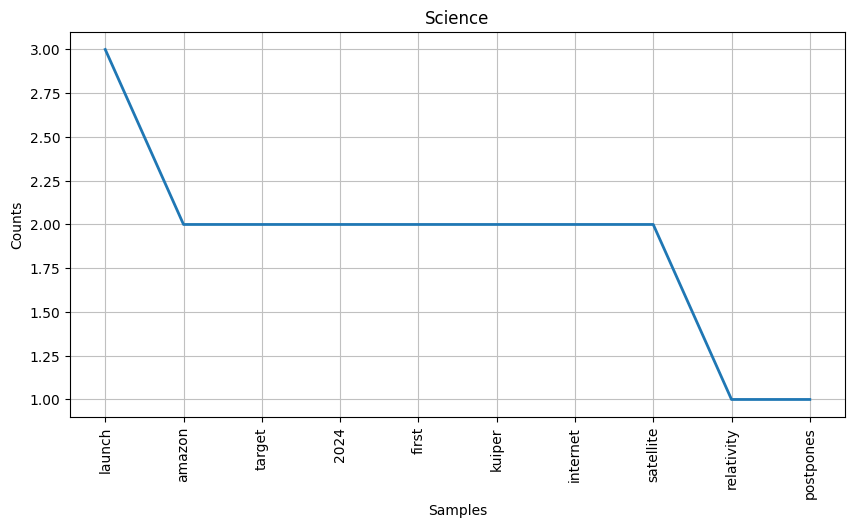

Topic: Shareholder Activism
[('australia', 1), ('biggest', 1), ('pension', 1), ('fund', 1), ('enough', 1), ('climate', 1), ('activist', 1), ('investor', 1), ('say', 1), ('carl', 1)]


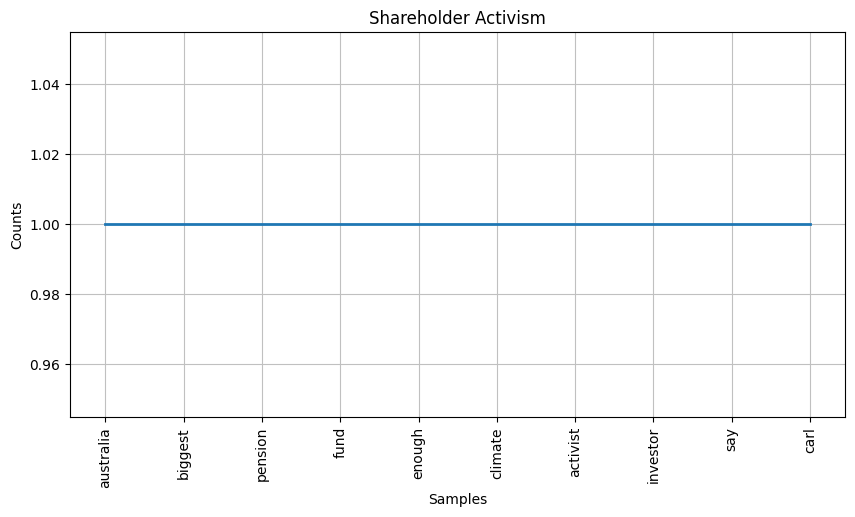

Topic: Sustainable & EV Supply Chain
[('bmw', 1), ('earnings', 1), ('lag', 1), ('estimate', 1), ('name', 1), ('new', 1), ('finance', 1), ('chief', 1)]


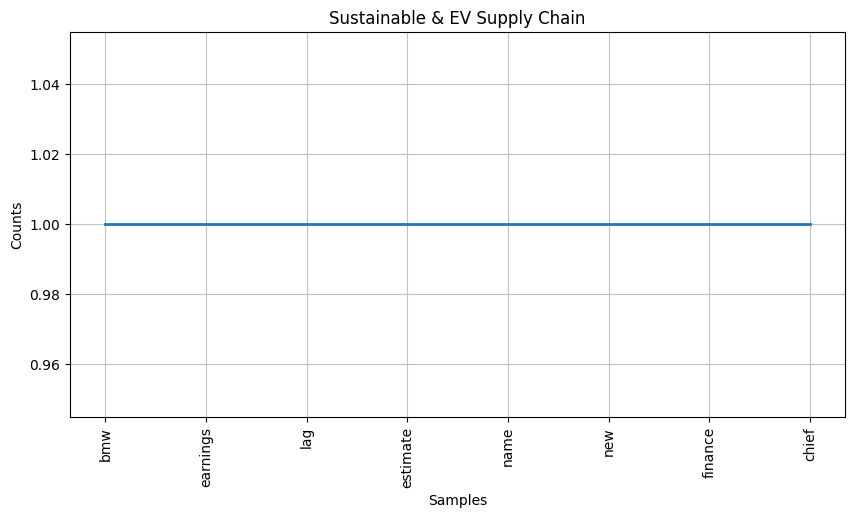

Topic: Sustainable Business
[('ikeas', 2), ('home', 2), ('delivery', 2), ('fully', 2), ('electric', 2), ('2025', 2), ('ceo', 2), ('say', 2), ('customer', 1), ('service', 1)]


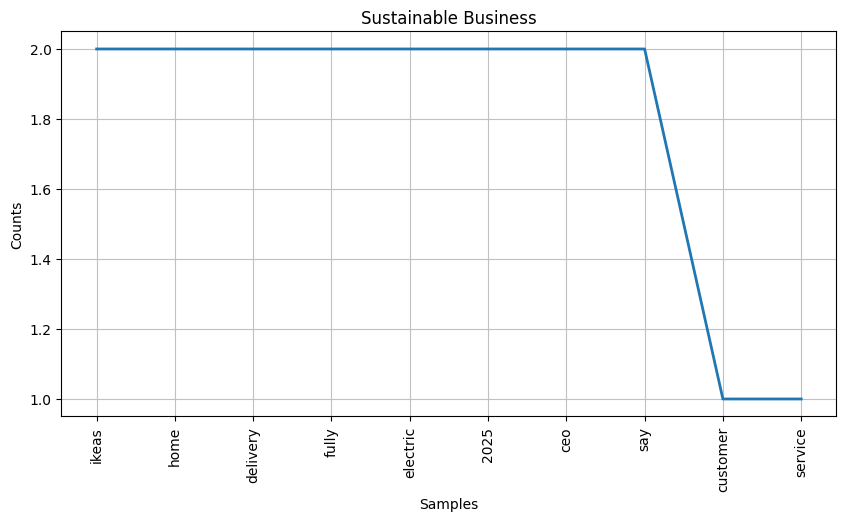

Topic: Sustainable Markets
[('eu', 5), ('hydrogen', 5), ('plan', 4), ('renewable', 3), ('energy', 3), ('draft', 3), ('climate', 3), ('emission', 2), ('new', 2), ('study', 2)]


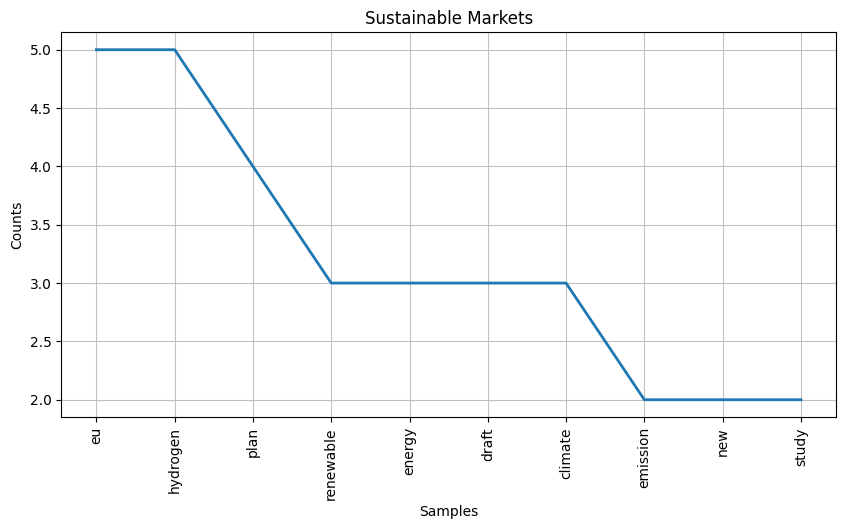

Topic: Take Five
[('take', 27), ('five', 27), ('tokyo', 4), ('central', 4), ('everything', 3), ('staring', 2), ('ceiling', 2), ('much', 2), ('say', 2), ('davos', 2)]


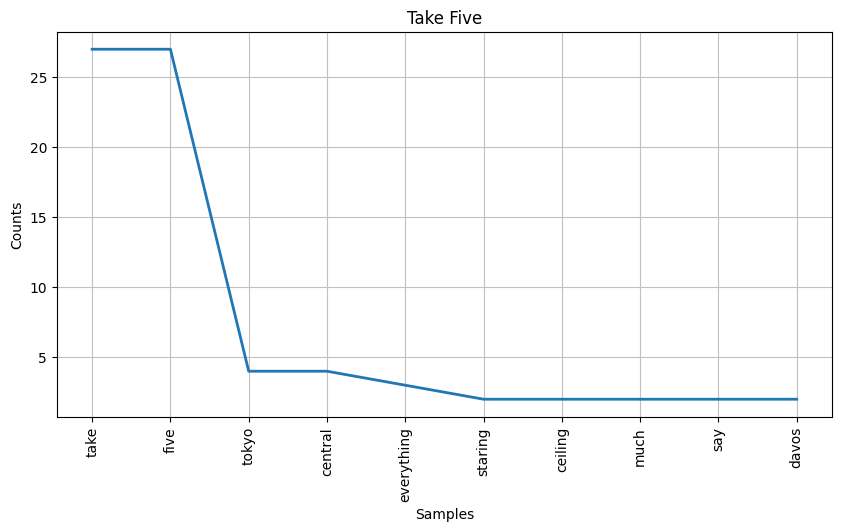

Topic: Technology
[('say', 8), ('exclusive', 7), ('new', 6), ('u', 6), ('tiktok', 5), ('vietnam', 4), ('ban', 4), ('firm', 4), ('preparing', 4), ('account', 4)]


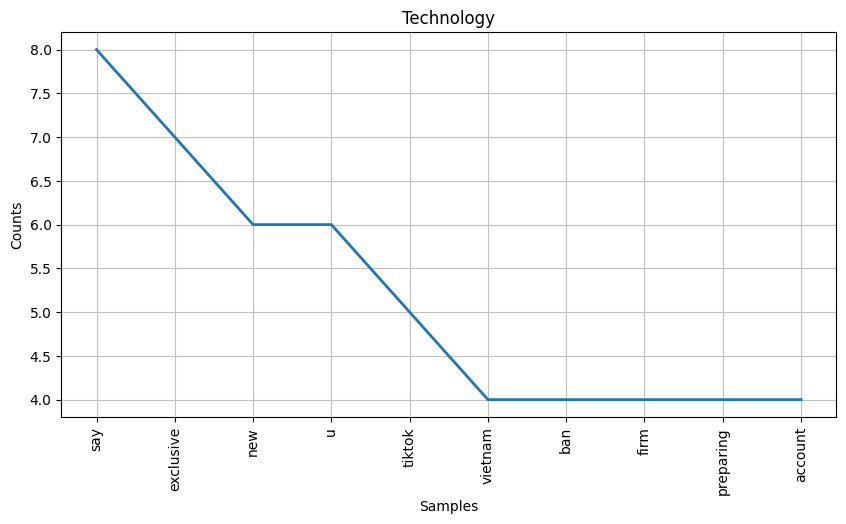

Topic: U.S. Markets
[('bank', 8), ('wall', 6), ('street', 6), ('u', 4), ('market', 4), ('first', 2), ('republic', 2), ('share', 2), ('fed', 2), ('rate', 2)]


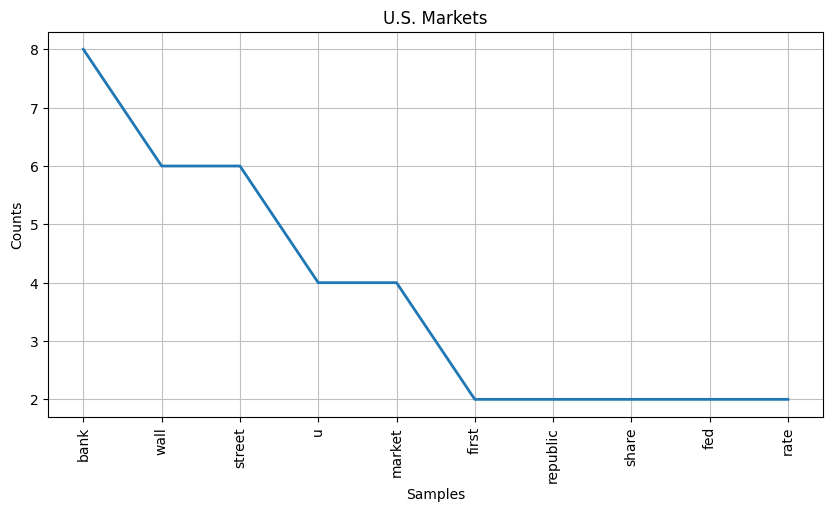

Topic: United Kingdom
[('uk', 24), ('pay', 6), ('say', 6), ('strike', 5), ('deal', 5), ('hunt', 5), ('budget', 5), ('tiktok', 4), ('government', 4), ('new', 4)]


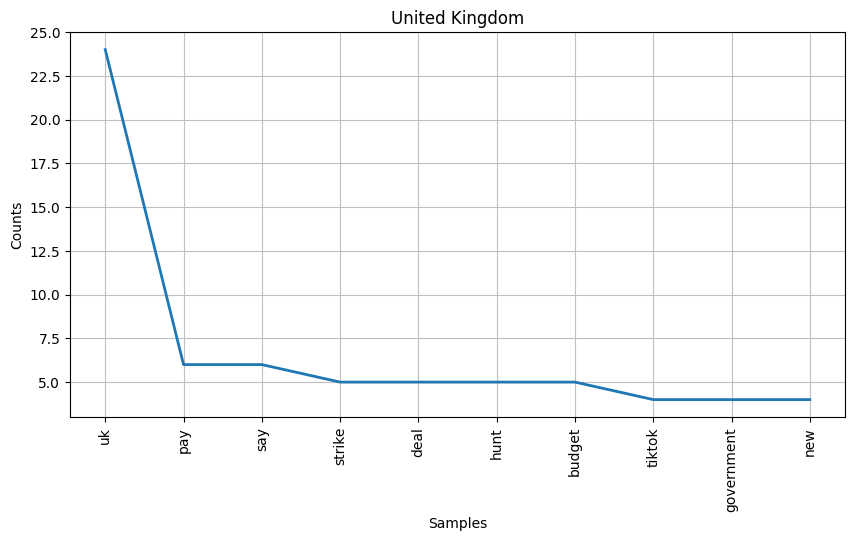

Topic: United States
[('u', 15), ('state', 4), ('abortion', 4), ('jury', 4), ('senator', 3), ('california', 3), ('grand', 3), ('trump', 3), ('say', 3), ('bank', 3)]


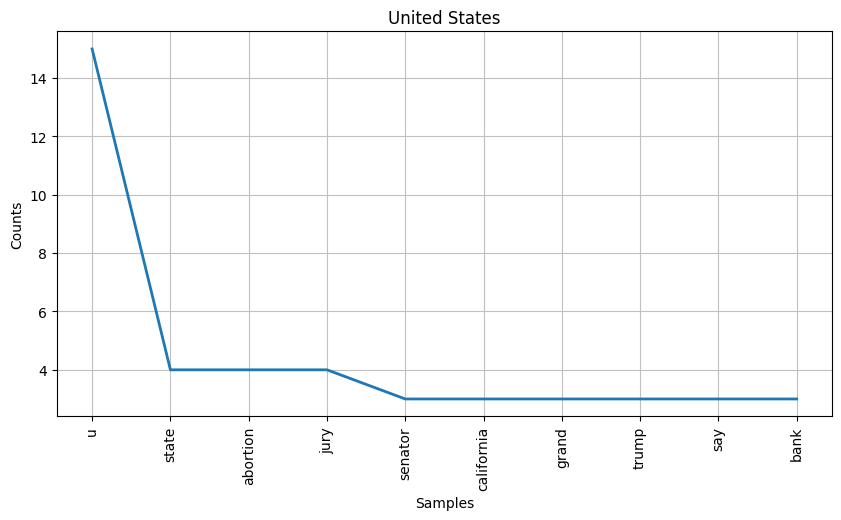

Topic: Water Management
[('philippine', 2), ('firm', 2), ('planning', 2), ('ipo', 2), ('target', 2), ('new', 2), ('gas', 2), ('well', 2), ('solar', 2), ('investment', 2)]


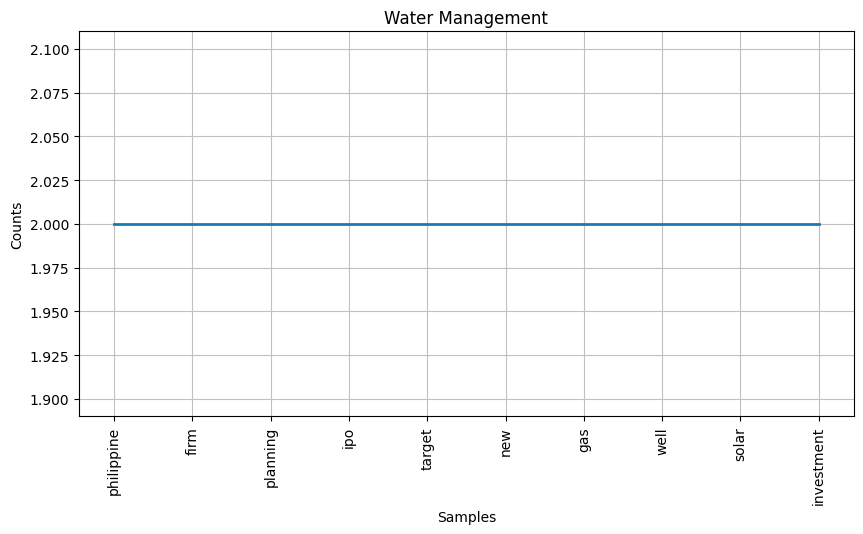

Topic: Wind
[('ceraweekrenewable', 1), ('energy', 1), ('investor', 1), ('squeezed', 1), ('higher', 1), ('interest', 1), ('rate', 1), ('cost', 1)]


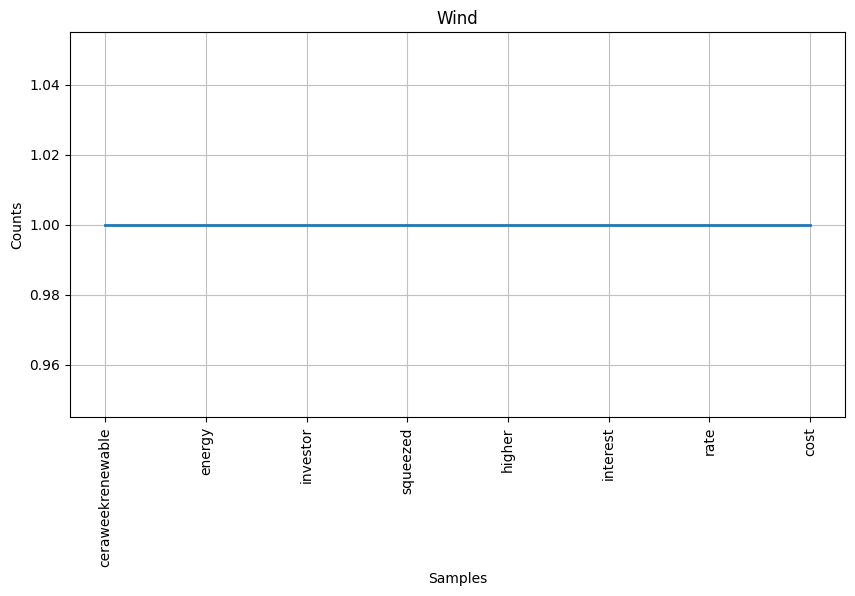

Topic: World
[('u', 24), ('ukraine', 15), ('russia', 15), ('china', 14), ('say', 14), ('uk', 13), ('drone', 11), ('deal', 8), ('security', 7), ('britain', 7)]


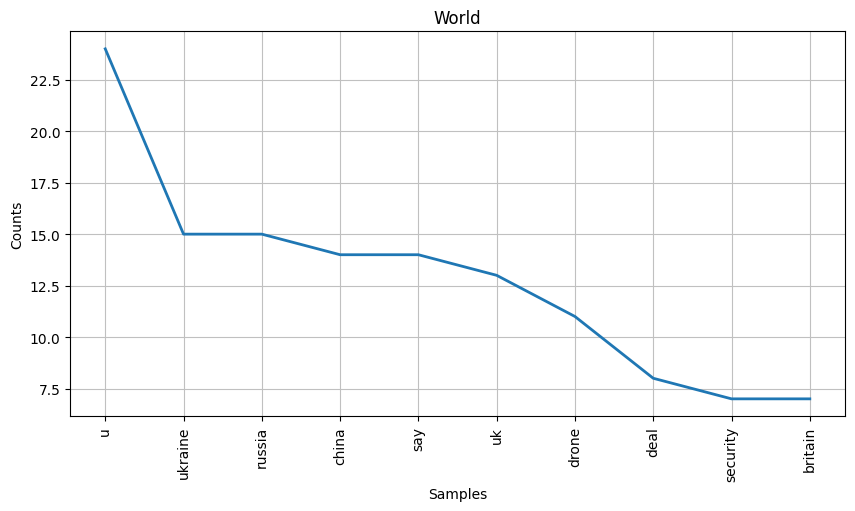

Topic: World at Work
[('uk', 8), ('job', 7), ('cut', 6), ('union', 5), ('pay', 5), ('worker', 4), ('japan', 4), ('rise', 4), ('strike', 3), ('3', 3)]


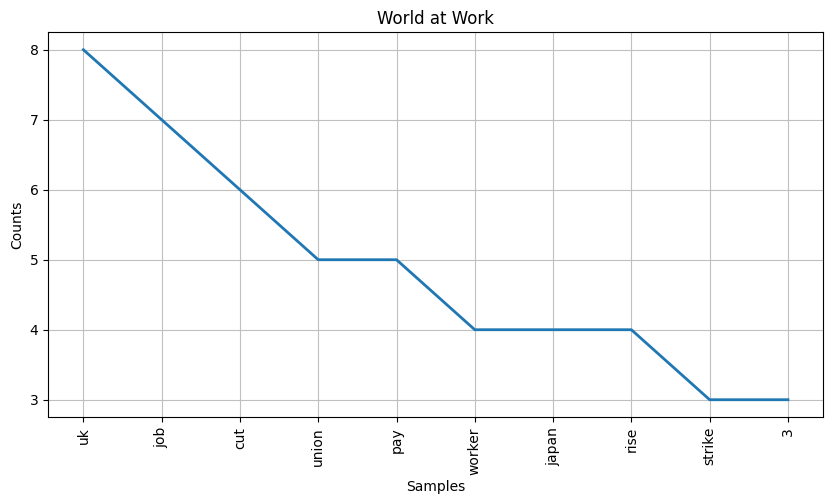

Topic: americas
[('canada', 1), ('asylum', 1), ('seeker', 1), ('using', 1), ('unofficial', 1), ('u', 1), ('border', 1), ('crossing', 1)]


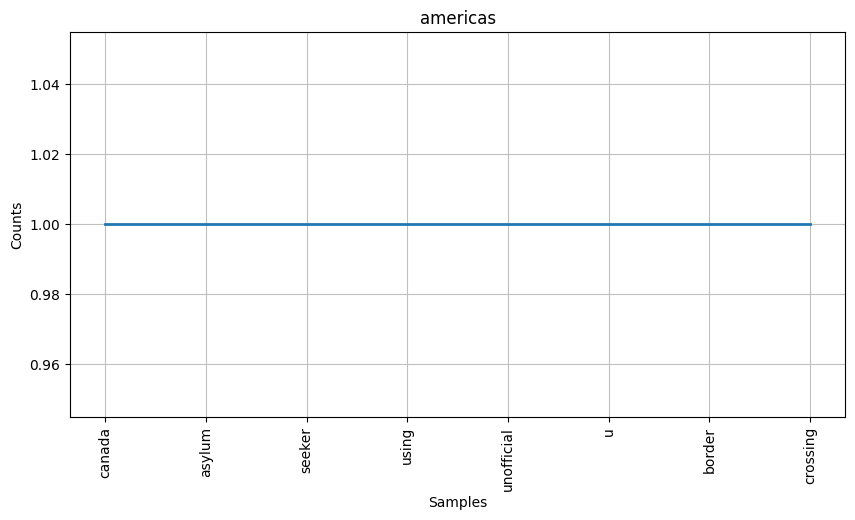

Topic: asia-pacific
[('japan', 1), ('battle', 1), ('persuade', 1), ('big', 1), ('brand', 1), ('join', 1), ('military', 1), ('buildout', 1)]


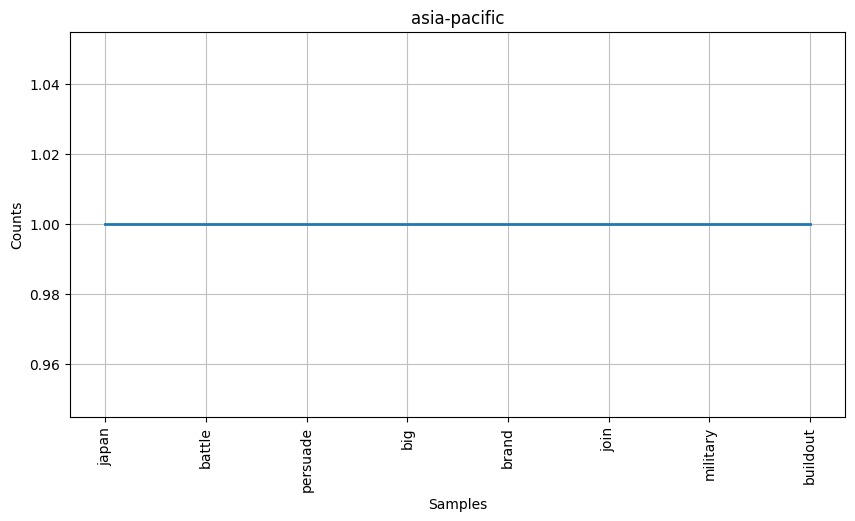

Topic: energy
[('explainer', 1), ('norway', 1), ('export', 1), ('natural', 1), ('gas', 1)]


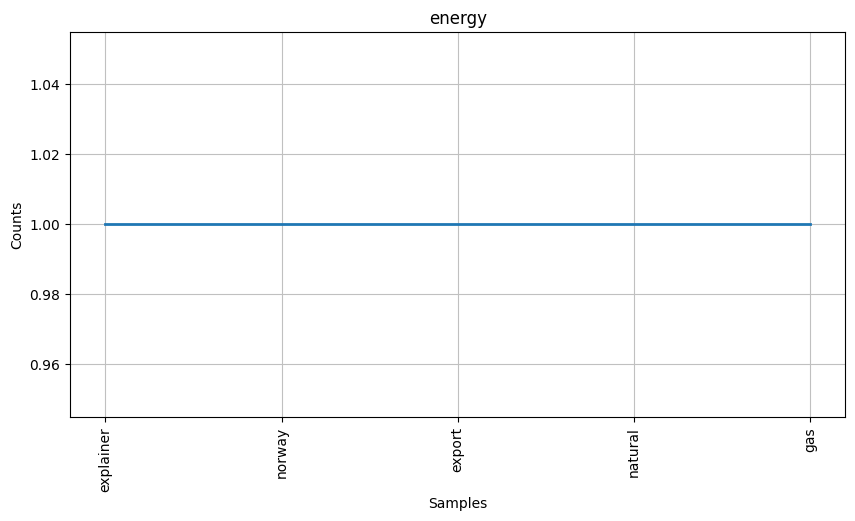

Topic: europe
[('ukraine', 2), ('explainer', 1), ('china', 1), ('broker', 1), ('peace', 1), ('russia', 1), ('north', 1), ('bakhmut', 1), ('another', 1), ('key', 1)]


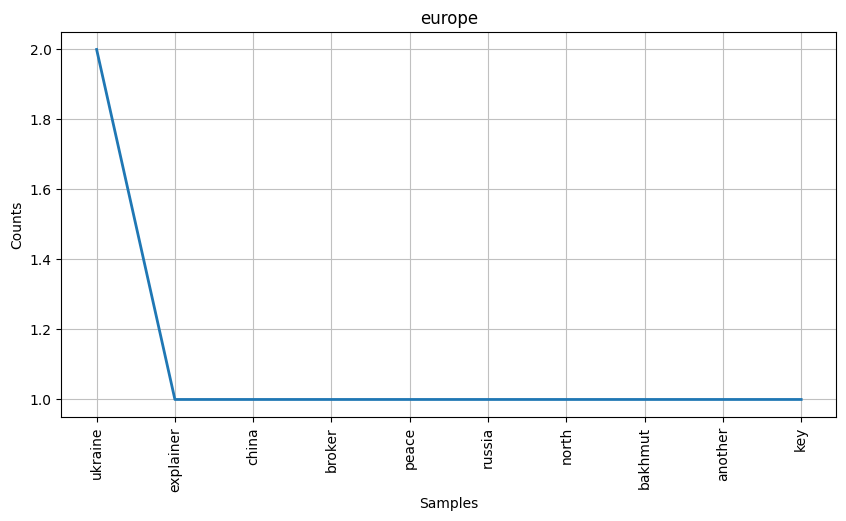

Topic: finance
[('credit', 3), ('suisse', 3), ('crisis', 2), ('point', 2), ('happened', 1), ('reach', 1), ('explainer', 1), ('get', 1), ('precipice', 1), ('day', 1)]


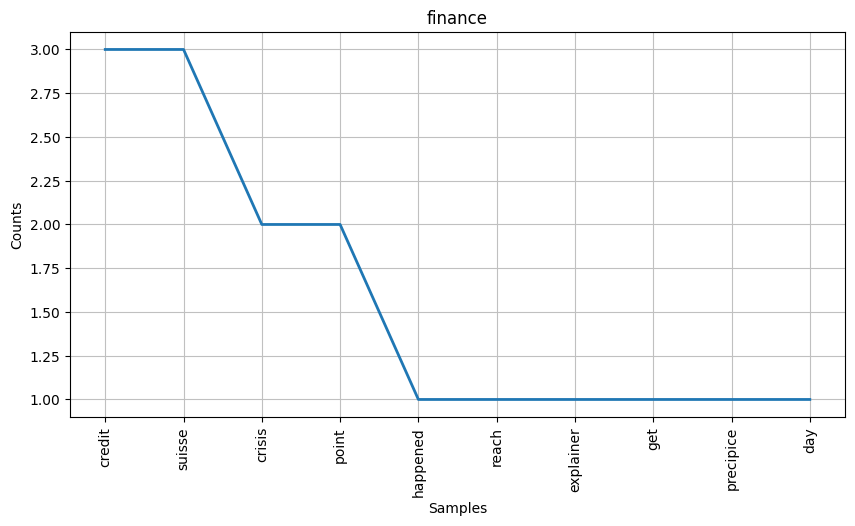

Topic: middle-east
[('new', 1), ('intifada', 1), ('young', 1), ('palestinian', 1), ('fighter', 1), ('rise', 1), ('west', 1), ('bank', 1), ('boil', 1)]


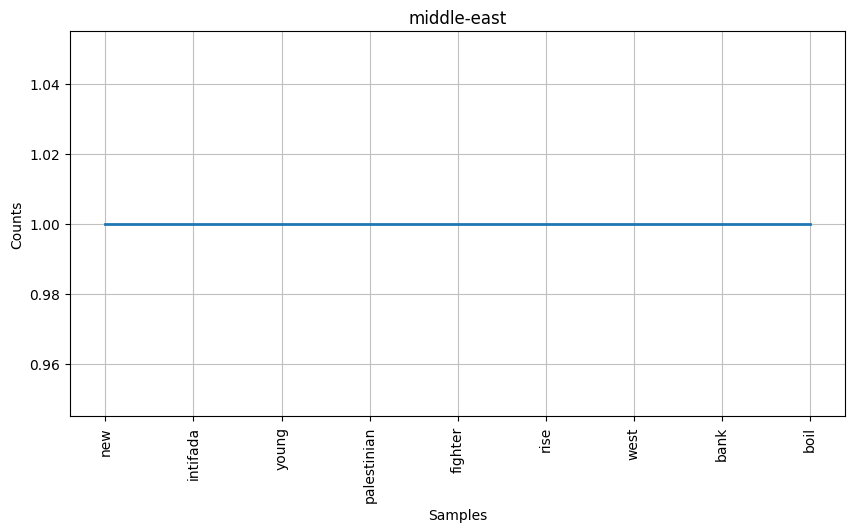

Topic: retail-consumer
[('food', 2), ('maker', 2), ('feeling', 2), ('squeezed', 2), ('pull', 2), ('plug', 2), ('slowselling', 2), ('product', 2)]


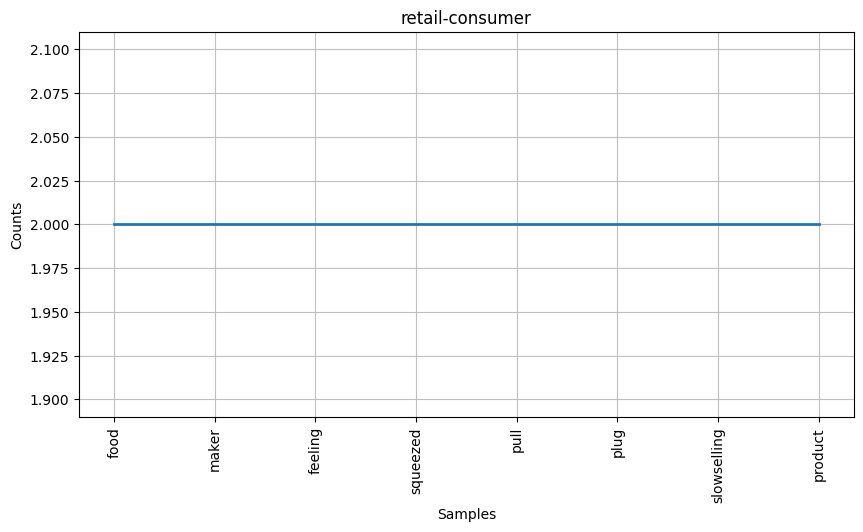

Topic: studio-a24-captures-oscar-spotlight-with-big-wins-best-picture-acting-2023-03-13
[('studio', 1), ('a24', 1), ('capture', 1), ('oscar', 1), ('spotlight', 1), ('big', 1), ('win', 1), ('best', 1), ('picture', 1), ('acting', 1)]


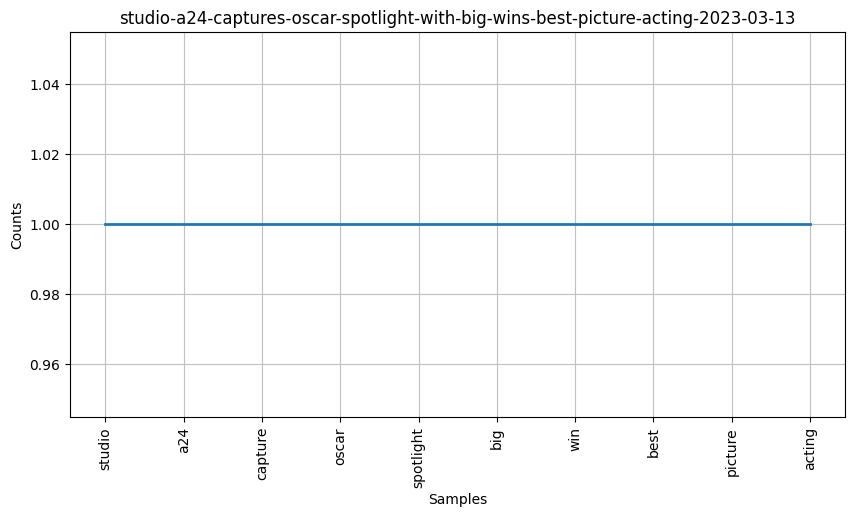

Topic: sustainable-business
[('greenwashing', 1), ('crackdown', 1), ('europe', 1), ('leaf', 1), ('investor', 1), ('dark', 1)]


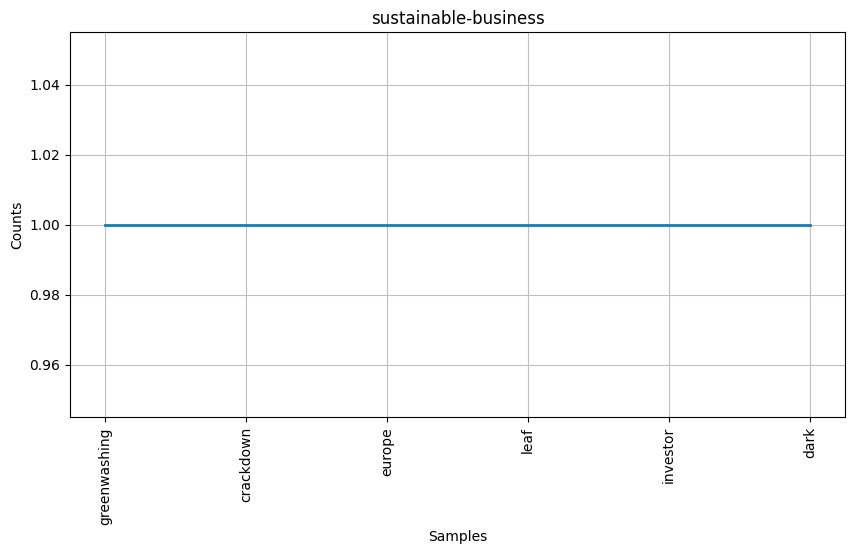

Topic: uk
[('britain', 2), ('tax', 1), ('take', 1), ('risk', 1), ('blowing', 1), ('green', 1), ('energy', 1), ('target', 1), ('health', 1), ('system', 1)]


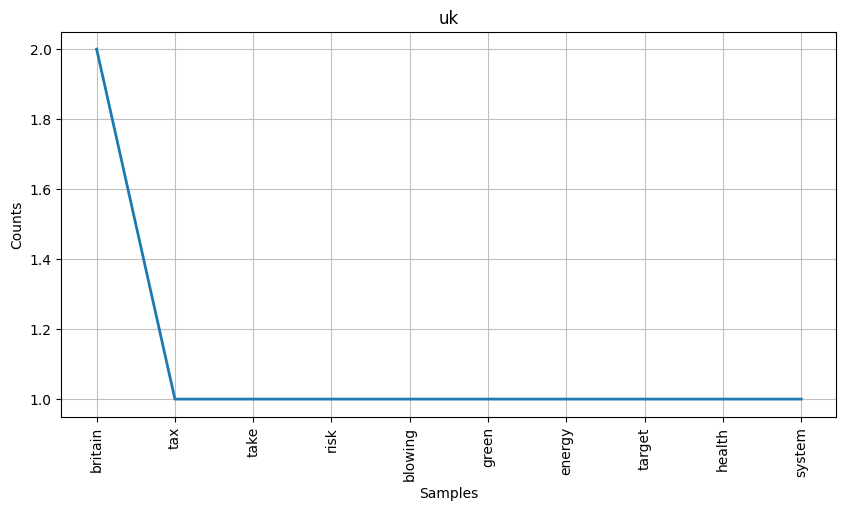

Topic: xiaomis-slow-shift-india-premium-smartphones-helps-samsung-steal-its-crown-2023-03-16
[('xiaomis', 2), ('slow', 2), ('shift', 2), ('india', 2), ('premium', 2), ('smartphones', 2), ('help', 2), ('samsung', 2), ('steal', 2), ('crown', 2)]


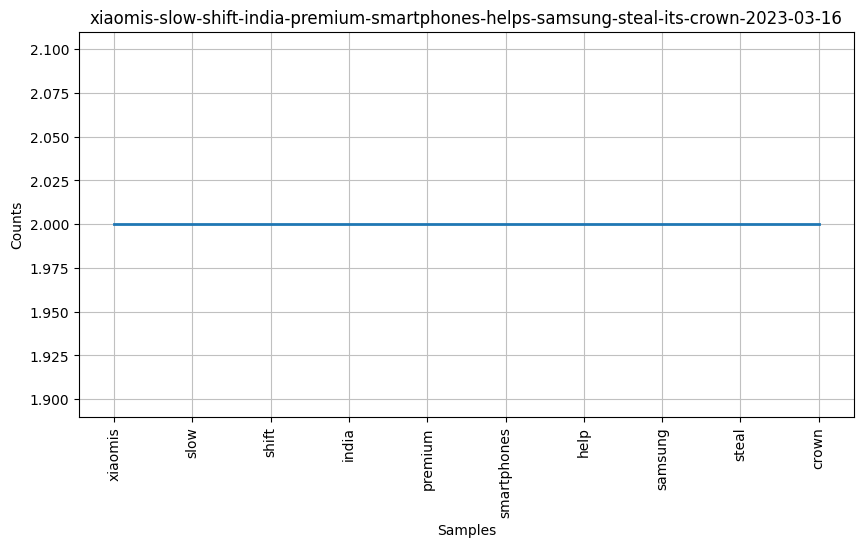

In [5]:
# Group the dataframe by 'Topics'
grouped_df = df.groupby('Topics')

# Loop through each group and get the word frequency distribution
for i,(topic, group) in enumerate(grouped_df):
    # Concatenate all the article titles in the group into a single string
    titles_str = ' '.join(group['Title'].tolist())
    
    # Preprocess the string of titles
    preprocessed_titles_str = preprocess_text(titles_str)
    
    # Tokenize the preprocessed string of titles
    tokens = word_tokenize(preprocessed_titles_str)
    
    # Create a frequency distribution of the tokens
    freq_dist = FreqDist(tokens)
    
    # Print the top 10 most common words for this topic
    print('Topic:', topic)
    print(freq_dist.most_common(10))
    plt.figure(figsize=(10, 5))
    freq_dist.plot(10, title=topic)
    